In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Set style
# plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# =============================================================================
# EXPERIMENT 7 RESULTS - FIXED ORTHOGONALIZATION
# =============================================================================

# -----------------------------------------------------------------------------
# TABLE 1: data_rows - Main experimental results
# -----------------------------------------------------------------------------
data_rows = [
    # Default dataset (no chunk field)
    {'lr': '5e-6', 'dataset_type': 'default', 'experiment': 'baseline', 'mean': 0.4096, 'std': 0.0059, 'results': [0.4048, 0.4048, 0.4169, 0.4048, 0.4169]},
    {
        'lr': '5e-6',
        'dataset_type': 'default',
        'experiment': 'osft-chunked-chunk0',
        'mean': 0.4323,
        'std': 0.0047,
        'results': [0.4265, 0.4361, 0.4265, 0.4361, 0.4361]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'default',
        'experiment': 'osft-chunked-chunk1',
        'mean': 0.4530,
        'std': 0.0059,
        'results': [0.4602, 0.4482, 0.4482, 0.4482, 0.4602]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'default',
        'experiment': 'osft-chunked-chunk2',
        'mean': 0.4440,
        'std': 0.0073,
        'results': [0.4482, 0.4482, 0.4482, 0.4313]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'default',
        'experiment': 'osft-chunked-decreasing-chunk0',
        'mean': 0.4371,
        'std': 0.0048,
        'results': [0.4313, 0.4410, 0.4313, 0.4410, 0.4410]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'default',
        'experiment': 'osft-chunked-decreasing-chunk1',
        'mean': 0.4429,
        'std': 0.0083,
        'results': [0.4361, 0.4361, 0.4530, 0.4530, 0.4361]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'default',
        'experiment': 'osft-chunked-decreasing-chunk2',
        'mean': 0.4757,
        'std': 0.0068,
        'results': [0.4892, 0.4723, 0.4723, 0.4723, 0.4723]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'default',
        'experiment': 'osft-full',
        'mean': 0.5109,
        'std': 0.0059,
        'results': [0.5157, 0.5036, 0.5036, 0.5157, 0.5157]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'default',
        'experiment': 'sft-chunked-chunk0',
        'mean': 0.4251,
        'std': 0.0012,
        'results': [0.4241, 0.4241, 0.4241, 0.4265, 0.4265]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'default',
        'experiment': 'sft-chunked-chunk1',
        'mean': 0.4921,
        'std': 0.0010,
        'results': [0.4916, 0.4916, 0.4916, 0.4940, 0.4916]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'default',
        'experiment': 'sft-chunked-chunk2',
        'mean': 0.4776,
        'std': 0.0010,
        'results': [0.4771, 0.4771, 0.4771, 0.4771, 0.4795]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'default',
        'experiment': 'sft-full',
        'mean': 0.5041,
        'std': 0.0035,
        'results': [0.5012, 0.5012, 0.5084, 0.5012, 0.5084]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'default',
        'experiment': 'osft-chunked-reset-chunk0',
        'mean': 0.4415,
        'std': 0.0035,
        'results': [0.4386, 0.4386, 0.4458, 0.4386, 0.4458],
    },
    {
        'lr': '5e-6',
        'dataset_type': 'default',
        'experiment': 'osft-chunked-reset-chunk1',
        'mean': 0.4713,
        'std': 0.0047,
        'results': [0.4675, 0.4675, 0.4771, 0.4771, 0.4675 ]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'default',
        'experiment': 'osft-chunked-reset-chunk2',
        'mean': 0.4728,
        'std': 0.0038,
        'results': [ 0.4747, 0.4747, 0.4747, 0.4747, 0.4651 ]
    },
    

# | 5e-6 | default | default | osft-chunked-reset-phase0 | 0.4415 | 0.0035 | 5 | 0.4386, 0.4386, 0.4458, 0.4386, 0.4458 |
# | 5e-6 | default | default | osft-chunked-reset-phase1 | 0.4713 | 0.0047 | 5 | 0.4675, 0.4675, 0.4771, 0.4771, 0.4675 |
# | 5e-6 | default | default | osft-chunked-reset-phase2 | 0.4728 | 0.0038 | 5 | 0.4747, 0.4747, 0.4747, 0.4747, 0.4651 |
    
    # Progressive dataset (chunk field required)
    {'lr': '5e-6', 'dataset_type': 'progressive', 'chunk': 0, 'experiment': 'baseline-chunk0', 'mean': 0.4436, 'std': 0.0005, 'results': [0.4433, 0.4433, 0.4446, 0.4433, 0.4433]},
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 0,
        'experiment': 'osft-chunked-chunk0',
        'mean': 0.5346,
        'std': 0.0035,
        'results': [0.5359, 0.5306, 0.5359, 0.5306, 0.5398]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 0,
        'experiment': 'osft-chunked-decreasing-chunk0',
        'mean': 0.5246,
        'std': 0.0057,
        'results': [0.5176, 0.5267, 0.5332, 0.5267, 0.5189]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 0,
        'experiment': 'osft-full-chunk0',
        'mean': 0.5236,
        'std': 0.0029,
        'results': [0.5241, 0.5189, 0.5228, 0.5280, 0.5241]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 0,
        'experiment': 'sft-chunked-chunk0',
        'mean': 0.5179,
        'std': 0.0025,
        'results': [0.5189, 0.5137, 0.5215, 0.5176, 0.5176]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 0,
        'experiment': 'sft-full-chunk0',
        'mean': 0.5338,
        'std': 0.0032,
        'results': [0.5359, 0.5280, 0.5372, 0.5346, 0.5332]
    },
    # | 5e-6 | progressive | progressive_chunk_0 | osft-chunked-reset-phase0 | 0.5173 | 0.0013 | 5 | 0.5176, 0.5176, 0.5150, 0.5176, 0.5189 |
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 0,
        'experiment': 'osft-chunked-reset-chunk0',
        'mean': 0.5173,
        'std': 0.0013,
        'results': [ 0.5176, 0.5176, 0.5150, 0.5176, 0.5189 ]
    },


    {'lr': '5e-6', 'dataset_type': 'progressive', 'chunk': 1, 'experiment': 'baseline-chunk1', 'mean': 0.4319, 'std': 0.0007, 'results': [0.4330, 0.4317, 0.4310, 0.4323, 0.4317]},
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 1,
        'experiment': 'osft-chunked-chunk1',
        'mean': 0.5034,
        'std': 0.0016,
        'results': [0.5030, 0.5036, 0.5023, 0.5017, 0.5063]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 1,
        'experiment': 'osft-chunked-decreasing-chunk1',
        'mean': 0.5043,
        'std': 0.0009,
        'results': [0.5036, 0.5036, 0.5056, 0.5050, 0.5036]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 1,
        'experiment': 'osft-full-chunk1',
        'mean': 0.5122,
        'std': 0.0015,
        'results': [0.5116, 0.5102, 0.5122, 0.5122, 0.5149]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 1,
        'experiment': 'sft-chunked-chunk1',
        'mean': 0.5290,
        'std': 0.0013,
        'results': [0.5287, 0.5294, 0.5307, 0.5294, 0.5267]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 1,
        'experiment': 'sft-full-chunk1',
        'mean': 0.5237,
        'std': 0.0018,
        'results': [0.5234, 0.5254, 0.5261, 0.5221, 0.5215]
    },
    # | 5e-6 | progressive | progressive_chunk_1 | osft-chunked-reset-phase1 | 0.5117 | 0.0013 | 5 | 0.5122, 0.5122, 0.5102, 0.5102, 0.5135 |
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 1,
        'experiment': 'osft-chunked-reset-chunk1',
        'mean': 0.5117,
        'std': 0.0013,
        'results': [ 0.5122, 0.5122, 0.5102, 0.5102, 0.5135 ]
    },

    {'lr': '5e-6', 'dataset_type': 'progressive', 'chunk': 2, 'experiment': 'baseline-chunk2', 'mean': 0.4302, 'std': 0.0021, 'results': [0.4336, 0.4305, 0.4279, 0.4279, 0.4309]},
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 2,
        'experiment': 'osft-chunked-chunk2',
        'mean': 0.4891,
        'std': 0.0014,
        'results': [0.4867, 0.4889, 0.4906, 0.4889, 0.4906]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 2,
        'experiment': 'osft-chunked-decreasing-chunk2',
        'mean': 0.4849,
        'std': 0.0026,
        'results': [0.4815, 0.4858, 0.4893, 0.4832, 0.4845]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 2,
        'experiment': 'osft-full-chunk2',
        'mean': 0.5015,
        'std': 0.0015,
        'results': [0.5020, 0.4989, 0.5024, 0.5033, 0.5007]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 2,
        'experiment': 'sft-chunked-chunk2',
        'mean': 0.5007,
        'std': 0.0005,
        'results': [0.5002, 0.5007, 0.5015, 0.5007, 0.5002]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 2,
        'experiment': 'sft-full-chunk2',
        'mean': 0.5189,
        'std': 0.0016,
        'results': [0.5159, 0.5198, 0.5185, 0.5194, 0.5207]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'progressive',
        'chunk': 2,
        'experiment': 'osft-chunked-reset-chunk2',
        'mean': 0.4862,
        'std': 0.0009,
        'results': [ 0.4871, 0.4854, 0.4850, 0.4871, 0.4863 ]
    },
    
    # Single-chunk dataset (chunk field required)
    {'lr': '5e-6', 'dataset_type': 'single-chunk', 'chunk': 0, 'experiment': 'baseline-chunk0', 'mean': 0.4441, 'std': 0.0010, 'results': [0.4420, 0.4446, 0.4446, 0.4446, 0.4446]},
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 0,
        'experiment': 'osft-chunked-chunk0',
        'mean': 0.5367,
        'std': 0.0016,
        'results': [0.5359, 0.5359, 0.5398, 0.5359, 0.5359]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 0,
        'experiment': 'osft-chunked-decreasing-chunk0',
        'mean': 0.5262,
        'std': 0.0027,
        'results': [0.5215, 0.5293, 0.5267, 0.5254, 0.5280]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 0,
        'experiment': 'osft-full-chunk0',
        'mean': 0.5238,
        'std': 0.0025,
        'results': [0.5254, 0.5202, 0.5254, 0.5267, 0.5215]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 0,
        'experiment': 'sft-chunked-chunk0',
        'mean': 0.5160,
        'std': 0.0034,
        'results': [0.5202, 0.5137, 0.5137, 0.5124, 0.5202]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 0,
        'experiment': 'sft-full-chunk0',
        'mean': 0.5346,
        'std': 0.0028,
        'results': [0.5319, 0.5372, 0.5306, 0.5359, 0.5372]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 0,
        'experiment': 'osft-chunked-reset-chunk0',
        'mean': 0.5147,
        'std': 0.0021,
        'results': [ 0.5124, 0.5124, 0.5163, 0.5176, 0.5150 ]
    },
    
    #  5e-6 | single-chunk | chunk_0 | osft-chunked-reset-phase0 | 0.5147 | 0.0021 | 5 | 0.5124, 0.5124, 0.5163, 0.5176, 0.5150 |
    {'lr': '5e-6', 'dataset_type': 'single-chunk', 'chunk': 1, 'experiment': 'baseline-chunk1', 'mean': 0.4295, 'std': 0.0055, 'results': [0.4230, 0.4269, 0.4256, 0.4360, 0.4360]},
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 1,
        'experiment': 'osft-chunked-chunk1',
        'mean': 0.4880,
        'std': 0.0010,
        'results': [0.4883, 0.4883, 0.4869, 0.4896, 0.4869]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 1,
        'experiment': 'osft-chunked-decreasing-chunk1',
        'mean': 0.4864,
        'std': 0.0053,
        'results': [0.4896, 0.4843, 0.4778, 0.4869, 0.4935]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 1,
        'experiment': 'osft-full-chunk1',
        'mean': 0.4958,
        'std': 0.0028,
        'results': [0.4935, 0.4922, 0.4974, 0.5000, 0.4961]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 1,
        'experiment': 'sft-chunked-chunk1',
        'mean': 0.5282,
        'std': 0.0025,
        'results': [0.5326, 0.5274, 0.5274, 0.5287, 0.5248]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 1,
        'experiment': 'sft-full-chunk1',
        'mean': 0.5167,
        'std': 0.0037,
        'results': [0.5196, 0.5196, 0.5104, 0.5196, 0.5144]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 1,
        'experiment': 'osft-chunked-reset-chunk1',
        'mean': 0.5044,
        'std': 0.0036,
        'results': [0.5000, 0.5013, 0.5052, 0.5052, 0.5104 ]
    },
    {'lr': '5e-6', 'dataset_type': 'single-chunk', 'chunk': 2, 'experiment': 'baseline-chunk2', 'mean': 0.4155, 'std': 0.0037, 'results': [0.4123, 0.4148, 0.4198, 0.4110, 0.4198]},
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 2,
        'experiment': 'osft-chunked-chunk2',
        'mean': 0.4825,
        'std': 0.0025,
        'results': [0.4812, 0.4837, 0.4787, 0.4825, 0.4862]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 2,
        'experiment': 'osft-chunked-decreasing-chunk2',
        'mean': 0.4614,
        'std': 0.0044,
        'results': [0.4662, 0.4612, 0.4536, 0.4612, 0.4649]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 2,
        'experiment': 'osft-full-chunk2',
        'mean': 0.4912,
        'std': 0.0054,
        'results': [0.4975, 0.4962, 0.4925, 0.4837, 0.4862]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 2,
        'experiment': 'sft-chunked-chunk2',
        'mean': 0.4845,
        'std': 0.0037,
        'results': [0.4850, 0.4812, 0.4912, 0.4812, 0.4837]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 2,
        'experiment': 'sft-full-chunk2',
        'mean': 0.5078,
        'std': 0.0025,
        'results': [0.5088, 0.5063, 0.5038, 0.5113, 0.5088]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'single-chunk',
        'chunk': 2,
        'experiment': 'osft-chunked-reset-chunk2',
        'mean': 0.4682,
        'std': 0.0019,
        'results': [0.4687, 0.4662, 0.4712, 0.4662, 0.4687 ]
    },
]


# -----------------------------------------------------------------------------
# TABLE 2: forgetting_data - Catastrophic forgetting measurements
# -----------------------------------------------------------------------------

forgetting_data = [
    {
        'lr': '5e-6',
        'dataset_type': 'forgetting',
        'chunk': 0,
        'experiment': 'osft-chunked-final-on-chunk0',
        'mean': 0.5080,
        'std': 0.0021,
        'results': [0.5059, 0.5111, 0.5059, 0.5072, 0.5098]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'forgetting',
        'chunk': 0,
        'experiment': 'osft-chunked-decreasing-final-on-chunk0',
        'mean': 0.5121,
        'std': 0.0025,
        'results': [0.5124, 0.5085, 0.5124, 0.5111, 0.5163]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'forgetting',
        'chunk': 0,
        'experiment': 'sft-chunked-final-on-chunk0',
        'mean': 0.4951,
        'std': 0.0017,
        'results': [0.4954, 0.4954, 0.4980, 0.4941, 0.4928]
    },
# | 5e-6 | forgetting | forgetting_chunk_0 | osft-chunked-reset-final-on-chunk0 | 0.5059 | 0.0008 | 5 | 0.5059, 0.5046, 0.5059, 0.5072, 0.5059 |
    {
        'lr': '5e-6',
        'dataset_type': 'forgetting',
        'chunk': 0,
        'experiment': 'osft-chunked-reset-final-on-chunk0',
        'mean': 0.5059,
        'std': 0.0008,
        # 'results': [0.4954, 0.4954, 0.4980, 0.4941, 0.4928]
        'results': [ 0.5059, 0.5046, 0.5059, 0.5072, 0.5059 ]
    },

    {
        'lr': '5e-6',
        'dataset_type': 'forgetting',
        'chunk': 1,
        'experiment': 'osft-chunked-final-on-chunk1',
        'mean': 0.4778,
        'std': 0.0040,
        'results': [0.4804, 0.4778, 0.4700, 0.4804, 0.4804]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'forgetting',
        'chunk': 1,
        'experiment': 'osft-chunked-decreasing-final-on-chunk1',
        'mean': 0.4799,
        'std': 0.0034,
        'results': [0.4778, 0.4804, 0.4856, 0.4752, 0.4804]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'forgetting',
        'chunk': 1,
        'experiment': 'sft-chunked-final-on-chunk1',
        'mean': 0.5175,
        'std': 0.0018,
        'results': [0.5144, 0.5196, 0.5183, 0.5183, 0.5170]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'forgetting',
        'chunk': 1,
        'experiment': 'sft-chunked-final-on-chunk1',
        'mean': 0.5175,
        'std': 0.0018,
        'results': [0.5144, 0.5196, 0.5183, 0.5183, 0.5170]
    },
#  | 5e-6 | forgetting | forgetting_chunk_1 | osft-chunked-reset-final-on-chunk1 | 0.4775 | 0.0036 | 5 | 0.4804, 0.4726, 0.4739, 0.4817, 0.4791 |
    {
        'lr': '5e-6',
        'dataset_type': 'forgetting',
        'chunk': 1,
        'experiment': 'osft-chunked-reset-final-on-chunk1',
        'mean': 0.4775,
        'std': 0.0036,
        'results': [ 0.4804, 0.4726, 0.4739, 0.4817, 0.4791 ]
    },
]


# -----------------------------------------------------------------------------
# TABLE 3: forward_transfer_data - Forward transfer measurements
# -----------------------------------------------------------------------------

forward_transfer_data = [
    {
        'lr': '5e-6',
        'dataset_type': 'forward-transfer',
        'experiment': 'osft-chunked-chunk0-on-chunk1',
        'mean': 0.4386,
        'std': 0.0043,
        'results': [0.4439, 0.4426, 0.4386, 0.4360, 0.4321]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'forward-transfer',
        'experiment': 'osft-chunked-decreasing-chunk0-on-chunk1',
        'mean': 0.4162,
        'std': 0.0016,
        'results': [0.4151, 0.4164, 0.4178, 0.4178, 0.4138]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'forward-transfer',
        'experiment': 'sft-chunked-chunk0-on-chunk1',
        'mean': 0.4144,
        'std': 0.0039,
        'results': [0.4178, 0.4138, 0.4151, 0.4073, 0.4178]
    },
    # | 5e-6 | forward-transfer | forward_transfer_chunk_1 | osft-chunked-reset-phase0-on-chunk1 | 0.4141 | 0.0043 | 5 | 0.4204, 0.4178, 0.4099, 0.4125, 0.4099 |
    {
        'lr': '5e-6',
        'dataset_type': 'forward-transfer',
        'experiment': 'osft-chunked-reset-chunk0-on-chunk1',
        'mean': 0.4141,
        'std': 0.0043,
        'results': [ 0.4204, 0.4178, 0.4099, 0.4125, 0.4099 ]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'forward-transfer',
        'experiment': 'osft-chunked-chunk0-on-chunk2',
        'mean': 0.4238,
        'std': 0.0040,
        'results': [0.4286, 0.4273, 0.4173, 0.4236, 0.4223]
    },
# | 5e-6 | forward-transfer | forward_transfer_chunk_2 | osft-chunked-reset-phase0-on-chunk2 | 0.4125 | 0.0026 | 5 | 0.4098, 0.4123, 0.4123, 0.4173, 0.4110 |
    {
        'lr': '5e-6',
        'dataset_type': 'forward-transfer',
        'experiment': 'osft-chunked-reset-chunk0-on-chunk2',
        'mean': 0.4125,
        'std': 0.0026,
        'results': [ 0.4098, 0.4123, 0.4123, 0.4173, 0.4110 ]
    },
    # | 5e-6 | forward-transfer | forward_transfer_chunk_2 | osft-chunked-reset-phase1-on-chunk2 | 0.4311 | 0.0030 | 5 | 0.4323, 0.4298, 0.4361, 0.4273, 0.4298 |
    {
        'lr': '5e-6',
        'dataset_type': 'forward-transfer',
        'experiment': 'osft-chunked-reset-chunk1-on-chunk2',
        'mean': 0.4311,
        'std': 0.0030,
        'results': [ 0.4323, 0.4298, 0.4361, 0.4273, 0.4298 ]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'forward-transfer',
        'experiment': 'osft-chunked-chunk1-on-chunk2',
        'mean': 0.4100,
        'std': 0.0040,
        'results': [0.4085, 0.4135, 0.4035, 0.4148, 0.4098]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'forward-transfer',
        'experiment': 'osft-chunked-decreasing-chunk0-on-chunk2',
        'mean': 0.4223,
        'std': 0.0023,
        'results': [0.4248, 0.4236, 0.4185, 0.4236, 0.4211]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'forward-transfer',
        'experiment': 'osft-chunked-decreasing-chunk1-on-chunk2',
        'mean': 0.4378,
        'std': 0.0021,
        'results': [0.4373, 0.4411, 0.4386, 0.4348, 0.4373]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'forward-transfer',
        'experiment': 'sft-chunked-chunk0-on-chunk2',
        'mean': 0.4263,
        'std': 0.0024,
        'results': [0.4286, 0.4248, 0.4286, 0.4273, 0.4223]
    },
    {
        'lr': '5e-6',
        'dataset_type': 'forward-transfer',
        'experiment': 'sft-chunked-chunk1-on-chunk2',
        'mean': 0.4378,
        'std': 0.0041,
        'results': [0.4336, 0.4424, 0.4323, 0.4411, 0.4398]
    },
]



# DETAILED LEADERBOARD DATA (per-category scores)
detailed_leaderboard_data = [
    {
        'experiment': 'Baseline',
        'overall': 41.72,
        'bbh': 51.01,
        'gpqa': 27.25,
        'ifeval': 77.55,
        'math_hard': 18.13,
        'mmlu_pro': 37.78,
        'musr': 38.57
    },
    {
        'experiment': 'OSFT Decreasing RR - Chunk 0',
        'overall': 42.03,
        'bbh': 49.22,
        'gpqa': 31.66,
        'ifeval': 75.85,
        'math_hard': 15.88,
        'mmlu_pro': 37.73,
        'musr': 41.86,
    },
    {
        'experiment': 'OSFT Decreasing RR - Chunk 1',
        'overall': 40.76,
        'bbh': 49.01,
        'gpqa': 31.25,
        'ifeval': 72.38,
        'math_hard': 15.38,
        'mmlu_pro': 36.67,
        'musr': 39.87,
    },
    {
        'experiment': 'OSFT Decreasing RR - Chunk 2',
        'overall': 40.87,
        'bbh': 49.25,
        'gpqa': 31.63,
        'ifeval': 73.02,
        'math_hard': 13.35,
        'mmlu_pro': 35.99,
        'musr': 41.99,
    },
    {
        'experiment': 'OSFT Chunked - Chunk 0',
        'overall': 42.39,
        'bbh': 49.71,
        'gpqa': 31.35,
        'ifeval': 75.94,
        'math_hard': 17.45,
        'mmlu_pro': 37.65,
        'musr': 42.25,
    },
    {
        'experiment': 'OSFT Chunked - Chunk 1',
        'overall': 41.39,
        'bbh': 49.96,
        'gpqa': 32.18,
        'ifeval': 73.51,
        'math_hard': 15.26,
        'mmlu_pro': 36.88,
        'musr': 40.53,
    },
    {
        'experiment': 'OSFT Chunked - Chunk 2',
        'overall': 40.95,
        'bbh': 49.96,
        'gpqa': 31.82,
        'ifeval': 69.21,
        'math_hard': 15.57,
        'mmlu_pro': 36.36,
        'musr': 42.79,
    },
    {
        'experiment': 'OSFT Full',
        'overall': 41.54,
        'bbh': 48.99,
        'gpqa': 33.52,
        'ifeval': 73.10,
        'math_hard': 16.20,
        'mmlu_pro': 37.29,
        'musr': 40.14,
    },
    {
        'experiment': 'SFT Chunked - Chunk 0',
        'overall': 39.94,
        'bbh': 49.70,
        'gpqa': 31.76,
        'ifeval': 67.45,
        'math_hard': 14.88,
        'mmlu_pro': 36.79,
        'musr': 39.07,
    },
    {
        'experiment': 'SFT Chunked - Chunk 1',
        'overall': 39.09,
        'bbh': 49.72,
        'gpqa': 30.56,
        'ifeval': 65.87,
        'math_hard': 14.31,
        'mmlu_pro': 35.91,
        'musr': 38.15,
    },
    {
        'experiment': 'SFT Chunked - Chunk 2',
        'overall': 38.79,
        'bbh': 49.35,
        'gpqa': 29.80,
        'ifeval': 64.75,
        'math_hard': 12.84,
        'mmlu_pro': 35.04,
        'musr': 40.94,
    },
    {
        'experiment': 'SFT Full',
        'overall': 38.53,
        'bbh': 50.00,
        'gpqa': 29.48,
        'ifeval': 63.04,
        'math_hard': 16.09,
        'mmlu_pro': 35.84,
        'musr': 36.71,
    },

#     Best checkpoint found:
# /mnt/4TB/os/checkpoints/osft-chunked-reset-exp_7/osft_chunked_reset/phase_0/hf_format/sa
# mples_77946.0
# Overall: 42.09%
# BBH: 48.73%
# GPQA: 32.36%
# IFEval: 74.23%
# MATH-Hard: 17.20%
# MMLU-Pro: 37.75%
# MUSR: 42.26%

# Best checkpoint found:
# /mnt/4TB/os/checkpoints/osft-chunked-reset-exp_7/osft_chunked_reset/phase_1/hf_format/sa
# mples_78234.0
# Overall: 41.38%
# BBH: 49.43%
# GPQA: 32.76%
# IFEval: 73.84%
# MATH-Hard: 14.86%
# MMLU-Pro: 37.01%
# MUSR: 40.39%

# Best checkpoint found:
# /mnt/4TB/os/checkpoints/osft-chunked-reset-exp_7/osft_chunked_reset/phase_2/hf_format/sa
# mples_79854.0
# Overall: 41.16%
# BBH: 49.56%
# GPQA: 32.02%
# IFEval: 71.59%
# MATH-Hard: 13.72%
# MMLU-Pro: 36.47%
# MUSR: 43.59%
    {
        'experiment': 'OSFT Chunked Reset - Chunk 0',
        'overall': 42.09,
        'bbh': 48.73,
        'gpqa': 32.36,
        'ifeval': 74.23,
        'math_hard': 17.20,
        'mmlu_pro': 37.75,
        'musr': 42.26,
    },
    {
        'experiment': 'OSFT Chunked Reset - Chunk 1',
        'overall': 41.38,
        'bbh': 49.43,
        'gpqa': 32.76,
        'ifeval': 73.84,
        'math_hard': 14.86,
        'mmlu_pro': 37.01,
        'musr': 40.39,
    },
    {
        'experiment': 'OSFT Chunked Reset - Chunk 2',
        'overall': 41.16,
        'bbh': 49.56,
        'gpqa': 32.02,
        'ifeval': 71.59,
        'math_hard': 13.72,
        'mmlu_pro': 36.47,
        'musr': 43.59,
    },
]

leaderboard_data = {exp['experiment']: exp['overall'] for exp in detailed_leaderboard_data}

# =============================================================================
# SUMMARY STATISTICS
# =============================================================================
print(f"Total data_rows entries: {len(data_rows)}")
print(f"  - default: {sum(1 for x in data_rows if x['dataset_type'] == 'default')}")
print(f"  - progressive: {sum(1 for x in data_rows if x['dataset_type'] == 'progressive')}")
print(f"  - single-chunk: {sum(1 for x in data_rows if x['dataset_type'] == 'single-chunk')}")
print(f"\nTotal forgetting_data entries: {len(forgetting_data)}")
print(f"Total forward_transfer_data entries: {len(forward_transfer_data)}")
print(f"\nGrand total: {len(data_rows) + len(forgetting_data) + len(forward_transfer_data)} entries")

# Create DataFrame
df = pd.DataFrame(data_rows)
print(f"Loaded {len(df)} data points")
print(f"Learning rates: {df['lr'].unique()}")
print(f"Dataset types: {df['dataset_type'].unique()}")

# Check single-chunk data
single_5e6 = df[(df['dataset_type'] == 'single-chunk') & (df['lr'] == '5e-6')]
print(f"\n5e-6 single-chunk experiments found: {len(single_5e6)}")
if len(single_5e6) > 0:
    print("Experiments:", single_5e6['experiment'].unique())

# Create forgetting dataframe
forgetting_df = pd.DataFrame(forgetting_data)
print(f"\n5e-6 forgetting experiments found: {len(forgetting_df)}")

# Create forward transfer dataframe
forward_transfer_df = pd.DataFrame(forward_transfer_data)
print(f"5e-6 forward-transfer experiments found: {len(forward_transfer_df)}")

# Create detailed leaderboard dataframe
detailed_leaderboard_df = pd.DataFrame(detailed_leaderboard_data)
print(f"\nAdded leaderboard data for {len(leaderboard_data)} experiments")
print(f"Detailed leaderboard data with {len(detailed_leaderboard_df)} experiments across 7 categories")


Total data_rows entries: 57
  - default: 15
  - progressive: 21
  - single-chunk: 21

Total forgetting_data entries: 9
Total forward_transfer_data entries: 12

Grand total: 78 entries
Loaded 57 data points
Learning rates: ['5e-6']
Dataset types: ['default' 'progressive' 'single-chunk']

5e-6 single-chunk experiments found: 21
Experiments: ['baseline-chunk0' 'osft-chunked-chunk0' 'osft-chunked-decreasing-chunk0'
 'osft-full-chunk0' 'sft-chunked-chunk0' 'sft-full-chunk0'
 'osft-chunked-reset-chunk0' 'baseline-chunk1' 'osft-chunked-chunk1'
 'osft-chunked-decreasing-chunk1' 'osft-full-chunk1' 'sft-chunked-chunk1'
 'sft-full-chunk1' 'osft-chunked-reset-chunk1' 'baseline-chunk2'
 'osft-chunked-chunk2' 'osft-chunked-decreasing-chunk2' 'osft-full-chunk2'
 'sft-chunked-chunk2' 'sft-full-chunk2' 'osft-chunked-reset-chunk2']

5e-6 forgetting experiments found: 9
5e-6 forward-transfer experiments found: 12

Added leaderboard data for 15 experiments
Detailed leaderboard data with 15 experiments acr

In [2]:
# Calculate 95% Confidence Intervals for the mean across runs (n=5)
print("Calculating 95% confidence intervals for the mean across runs...")

def calculate_95_ci_halfwidth(row):
    """
    Calculate 95% CI half-width for the mean across n=5 runs.
    Uses t-distribution: halfwidth = t_{0.975,4} * s / sqrt(5)
    where t_{0.975,4} = 2.776 for 95% CI with df=4
    """
    if 'results' in row and row['results'] is not None and len(row['results']) > 1:
        results = np.array(row['results'])
        n = len(results)
        
        # Sample standard deviation (Bessel's correction)
        s = np.std(results, ddof=1)
        
        # For n=5, df=4, t_{0.975,4} = 2.776
        t_critical = 2.776
        
        # 95% CI half-width
        halfwidth = t_critical * s / np.sqrt(n)
        return halfwidth
    else:
        return 0.0

# Calculate confidence interval half-widths
df['ci_halfwidth'] = df.apply(calculate_95_ci_halfwidth, axis=1)

# Also recalculate sample standard deviation for reference
df['std'] = df.apply(lambda row: np.std(row['results'], ddof=1) if 'results' in row and row['results'] is not None and len(row['results']) > 1 else row.get('std', 0), axis=1)

# Ensure CI is calculated for all rows (handle cases where it might be NaN)
print("\nChecking for NaN CIs...")
nan_ci_count = df['ci_halfwidth'].isna().sum()
if nan_ci_count > 0:
    print(f"Found {nan_ci_count} rows with NaN CI values")
    # For rows with NaN CI, try to calculate from std if available
    df.loc[df['ci_halfwidth'].isna(), 'ci_halfwidth'] = df.loc[df['ci_halfwidth'].isna(), 'std'] * 2.776 / np.sqrt(5)

# Show comparison of SD vs 95% CI half-width for a few examples
print("\nComparison of Standard Deviation vs 95% CI half-width (first 5 rows):")
print("Note: CI half-width represents uncertainty in the MEAN estimate")
for i in range(min(5, len(df))):
    row = df.iloc[i]
    sd = row['std']
    ci_hw = row['ci_halfwidth']
    ratio = ci_hw / sd if sd > 0 else 0
    print(f"{row['experiment'][:30]}: SD = {sd:.4f}, CI half-width = {ci_hw:.4f}, Ratio = {ratio:.2f}")

print(f"\n95% Confidence intervals calculated using t-distribution (t_0.975,4 = 2.776)")
print("Error bars will now represent uncertainty in the mean estimate, not run-to-run variability")

# Helper function to extract data with 95% CIs for plotting
def get_data_with_ci(data_df, filters):
    """
    Extract mean and 95% CI half-width from dataframe with given filters
    Returns values scaled to percentage (x100)
    """
    filtered_data = data_df
    for key, value in filters.items():
        filtered_data = filtered_data[filtered_data[key] == value]
    
    if len(filtered_data) > 0:
        row = filtered_data.iloc[0]
        return row['mean'] * 100, row['ci_halfwidth'] * 100
    else:
        return 0, 0

# # Plot 6: Forgetting Analysis - Original vs Final Performance on Previous Chunks

# Apply same 95% CI calculation to consolidated data
print("Calculating 95% CIs for forgetting data...")
forgetting_df = pd.DataFrame(forgetting_data)
forgetting_df['ci_halfwidth'] = forgetting_df.apply(calculate_95_ci_halfwidth, axis=1)
forgetting_df['std'] = forgetting_df.apply(lambda row: np.std(row['results'], ddof=1) if 'results' in row and row['results'] is not None and len(row['results']) > 1 else 0, axis=1)

print("\nCalculating 95% CIs for forward-transfer data...")
forward_transfer_df = pd.DataFrame(forward_transfer_data)
forward_transfer_df['ci_halfwidth'] = forward_transfer_df.apply(calculate_95_ci_halfwidth, axis=1)
forward_transfer_df['std'] = forward_transfer_df.apply(lambda row: np.std(row['results'], ddof=1) if 'results' in row and row['results'] is not None and len(row['results']) > 1 else 0, axis=1)

# Combine with main dataframe
df_with_forgetting = pd.concat([df, forgetting_df, forward_transfer_df], ignore_index=True)

print(f"Added {len(forgetting_data)} forgetting experiments")
print(f"Added {len(forward_transfer_data)} forward-transfer experiments")
print(f"Total data points: {len(df_with_forgetting)}")
print("All error bars will use 95% confidence intervals for the mean (t-distribution, n=5 runs)")

# Fix any NaN CI values in the combined dataframe
nan_ci_count = df_with_forgetting['ci_halfwidth'].isna().sum()
if nan_ci_count > 0:
    print(f"\nFixing {nan_ci_count} rows with NaN CI values in combined dataframe")
    # For rows with NaN CI, calculate from std if available
    mask = df_with_forgetting['ci_halfwidth'].isna() & (df_with_forgetting['std'] > 0)
    df_with_forgetting.loc[mask, 'ci_halfwidth'] = df_with_forgetting.loc[mask, 'std'] * 2.776 / np.sqrt(5)

# Debug: Check what single-chunk data we have
print("\nChecking single-chunk data availability:")
single_chunk_data = df_with_forgetting[df_with_forgetting['dataset_type'] == 'single-chunk']
print(f"Total single-chunk experiments: {len(single_chunk_data)}")
print("\nAvailable single-chunk experiments by LR:")
for lr in ['2e-5', '5e-6']:
    lr_data = single_chunk_data[single_chunk_data['lr'] == lr]
    if len(lr_data) > 0:
        print(f"\n{lr}: {sorted(lr_data['experiment'].unique())}")
    # Also check without lr filter
    no_lr_data = single_chunk_data[single_chunk_data['lr'].isna()]
    if len(no_lr_data) > 0:
        print(f"\nNo LR specified: {sorted(no_lr_data['experiment'].unique())}")

# Check if we still have NaN CIs for single-chunk data
single_chunk_nan_ci = single_chunk_data['ci_halfwidth'].isna().sum()
if single_chunk_nan_ci > 0:
    print(f"\nWarning: Still have {single_chunk_nan_ci} single-chunk experiments with NaN CI values")
    # Show which ones
    nan_experiments = single_chunk_data[single_chunk_data['ci_halfwidth'].isna()]['experiment'].unique()
    print(f"Experiments with NaN CIs: {nan_experiments}")


Calculating 95% confidence intervals for the mean across runs...

Checking for NaN CIs...

Comparison of Standard Deviation vs 95% CI half-width (first 5 rows):
Note: CI half-width represents uncertainty in the MEAN estimate
baseline: SD = 0.0066, CI half-width = 0.0082, Ratio = 1.24
osft-chunked-chunk0: SD = 0.0053, CI half-width = 0.0065, Ratio = 1.24
osft-chunked-chunk1: SD = 0.0066, CI half-width = 0.0082, Ratio = 1.24
osft-chunked-chunk2: SD = 0.0084, CI half-width = 0.0117, Ratio = 1.39
osft-chunked-decreasing-chunk0: SD = 0.0053, CI half-width = 0.0066, Ratio = 1.24

95% Confidence intervals calculated using t-distribution (t_0.975,4 = 2.776)
Error bars will now represent uncertainty in the mean estimate, not run-to-run variability
Calculating 95% CIs for forgetting data...

Calculating 95% CIs for forward-transfer data...
Added 9 forgetting experiments
Added 12 forward-transfer experiments
Total data points: 78
All error bars will use 95% confidence intervals for the mean (t-di

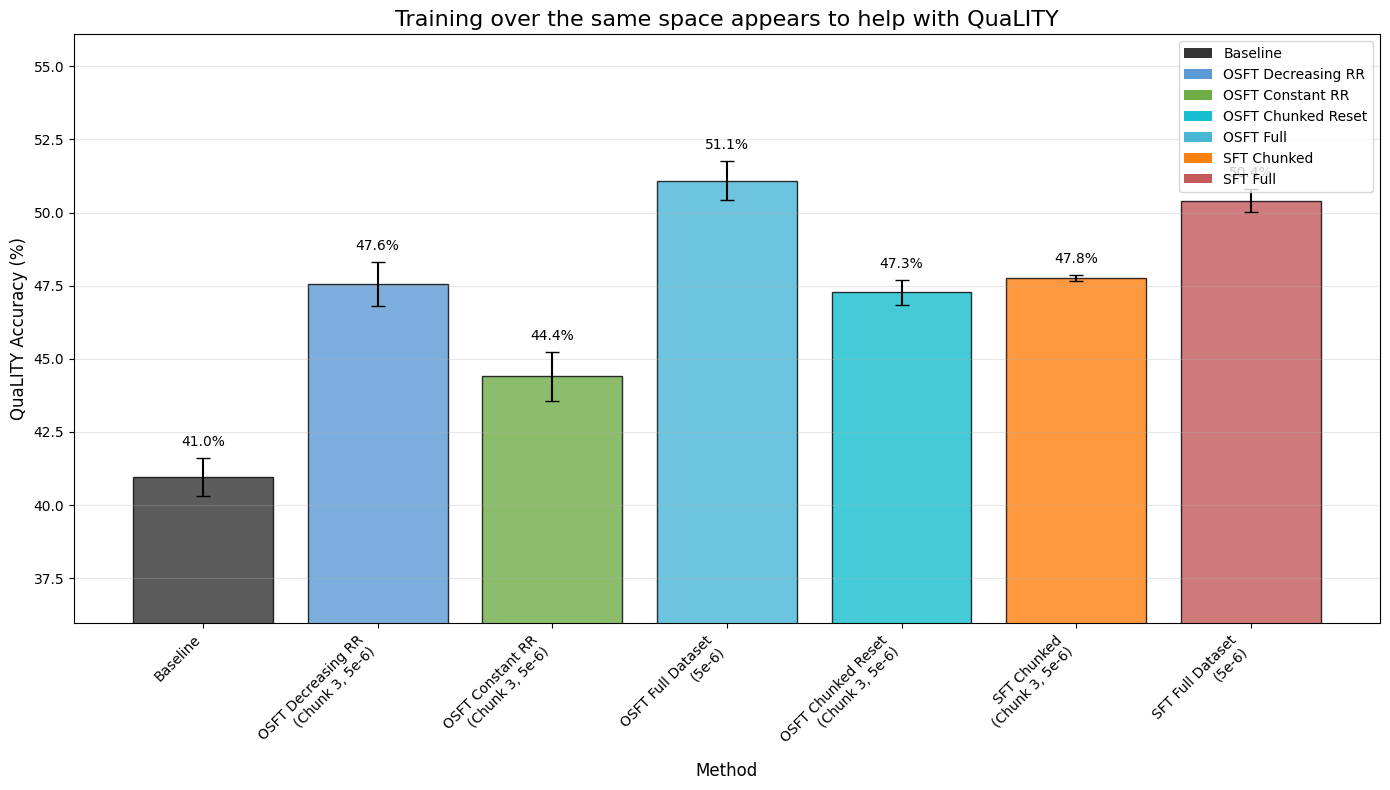

In [5]:
# CORRECTED Plot 1: Final performance on QuaLITY (bar chart with error bars)
# This version handles the SFT data labeling issue
plt.figure(figsize=(14, 8))

# Get final performance data (default dataset type, chunk 2 or full)
final_data = []

# Baseline
baseline_data = df[(df['experiment'] == 'baseline') & (df['dataset_type'] == 'default')].iloc[0]
final_data.append({
    'name': 'Baseline',
    'mean': baseline_data['mean'] * 100,
    'std': baseline_data['std'] * 100,
    'method': 'baseline'
})

# OSFT experiments (both learning rates)
for lr in ['5e-6']:
    # Chunked decreasing (chunk 2)
    chunked_dec = df[(df['lr'] == lr) & (df['experiment'] == 'osft-chunked-decreasing-chunk2') & 
                     (df['dataset_type'] == 'default')].iloc[0]
    final_data.append({
        'name': f'OSFT Decreasing RR\n(Chunk 3, {lr})',
        'mean': chunked_dec['mean'] * 100,
        'std': chunked_dec['std'] * 100,
        'method': 'osft',
        'lr': lr
    })
    
    # Chunked constant (chunk 2)
    chunked = df[(df['lr'] == lr) & (df['experiment'] == 'osft-chunked-chunk2') & 
                 (df['dataset_type'] == 'default')].iloc[0]
    final_data.append({
        'name': f'OSFT Constant RR\n(Chunk 3, {lr})',
        'mean': chunked['mean'] * 100,
        'std': chunked['std'] * 100,
        'method': 'osft',
        'lr': lr
    })
    
    # Full dataset
    full = df[(df['lr'] == lr) & (df['experiment'] == 'osft-full') & 
              (df['dataset_type'] == 'default')].iloc[0]
    final_data.append({
        'name': f'OSFT Full Dataset\n({lr})',
        'mean': full['mean'] * 100,
        'std': full['std'] * 100,
        'method': 'osft',
        'lr': lr
    })

    # OSFT Chunked Reset
    chunked_reset = df[(df['lr'] == lr) & (df['experiment'] == 'osft-chunked-reset-chunk2') & 
                       (df['dataset_type'] == 'default')].iloc[0]
    final_data.append({
        'name': f'OSFT Chunked Reset\n(Chunk 3, {lr})',
        'mean': chunked_reset['mean'] * 100,
        'std': chunked_reset['std'] * 100,
        'method': 'osft',
        'lr': lr
    })
    

# SFT experiments
# Note: SFT experiments are mislabeled in the dataframe - we need to check without lr filter
# SFT chunked (chunk 2)
sft_chunked_data = df[(df['experiment'] == 'sft-chunked-chunk2') & 
                      (df['dataset_type'] == 'default')]
if len(sft_chunked_data) > 0:
    sft_chunked = sft_chunked_data.iloc[0]
    actual_lr = sft_chunked.get('lr', '2e-5')
    final_data.append({
        'name': f'SFT Chunked\n(Chunk 3, {actual_lr})',
        'mean': sft_chunked['mean'] * 100,
        'std': sft_chunked['std'] * 100,
        'method': 'sft',
        'lr': actual_lr
    })

# SFT full
sft_full_data = df[(df['experiment'] == 'sft-full') & 
                   (df['dataset_type'] == 'default')]
if len(sft_full_data) > 0:
    sft_full = sft_full_data.iloc[0]
    actual_lr = sft_full.get('lr', '2e-5')
    final_data.append({
        'name': f'SFT Full Dataset\n({actual_lr})',
        'mean': sft_full['mean'] * 100,
        'std': sft_full['std'] * 100,
        'method': 'sft',
        'lr': actual_lr
    })

# Create bar plot
x = np.arange(len(final_data))
means = [d['mean'] for d in final_data]
stds = [d['std'] for d in final_data]
methods = [d['method'] for d in final_data]

# Enhanced color mapping to distinguish between different experiment types
colors = []
for i, d in enumerate(final_data):
    if d['method'] == 'baseline':
        colors.append('#333333')  # gray for baseline
    elif d['method'] == 'osft':
        # different colors for different OSFT variants
        if 'Decreasing RR' in d['name']:
            colors.append('#5B9BD5')  # blue for decreasing RR
        elif 'Constant RR' in d['name']:
            colors.append('#70AD47')  # green for constant RR
        elif 'Chunked Reset' in d['name']:
            colors.append('#17becf')  # cyan for chunked reset
        elif 'Full' in d['name']:
            colors.append('#49B6D6')  # lighter cyan for full OSFT
        else:
            colors.append('#1f77b4')  # default blue
    else:  # sft
        if 'Full' in d['name']:
            colors.append('#C55A5A')  # red for SFT full
        else:
            colors.append('#ff7f0e')  # orange for SFT chunked

bars = plt.bar(x, means, yerr=stds, capsize=5, color=colors, alpha=0.8, edgecolor='black')

# Add value labels
for i, (bar, mean, std) in enumerate(zip(bars, means, stds)):
    # Position labels slightly above error bars
    label_y = bar.get_height() + std + 0.3
    # Check if label would go above plot area and adjust if needed
    if label_y > 54.5:
        label_y = bar.get_height() - std - 0.5
        va = 'top'
    else:
        va = 'bottom'
    plt.text(bar.get_x() + bar.get_width()/2, label_y, 
             f'{mean:.1f}%', ha='center', va=va, fontsize=10)

plt.xlabel('Method', fontsize=12)
plt.ylabel('QuaLITY Accuracy (%)', fontsize=12)
plt.title('Training over the same space appears to help with QuaLITY', fontsize=16)
plt.xticks(x, [d['name'] for d in final_data], rotation=45, ha='right')

# Adjust y-axis limits based on actual data range
all_values = means
min_val = min(all_values) - 5
max_val = max(all_values) + 5
plt.ylim(max(0, min_val), min(100, max_val))

plt.grid(axis='y', alpha=0.3)

# create legend with proper handles
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#333333', label='Baseline'),
    Patch(facecolor='#5B9BD5', label='OSFT Decreasing RR'),
    Patch(facecolor='#70AD47', label='OSFT Constant RR'),
    Patch(facecolor='#17becf', label='OSFT Chunked Reset'),
    Patch(facecolor='#49B6D6', label='OSFT Full'),
    Patch(facecolor='#ff7f0e', label='SFT Chunked'),
    Patch(facecolor='#C55A5A', label='SFT Full')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()


# Old final quality eval plot

![old plot](./old-final-quality.png)

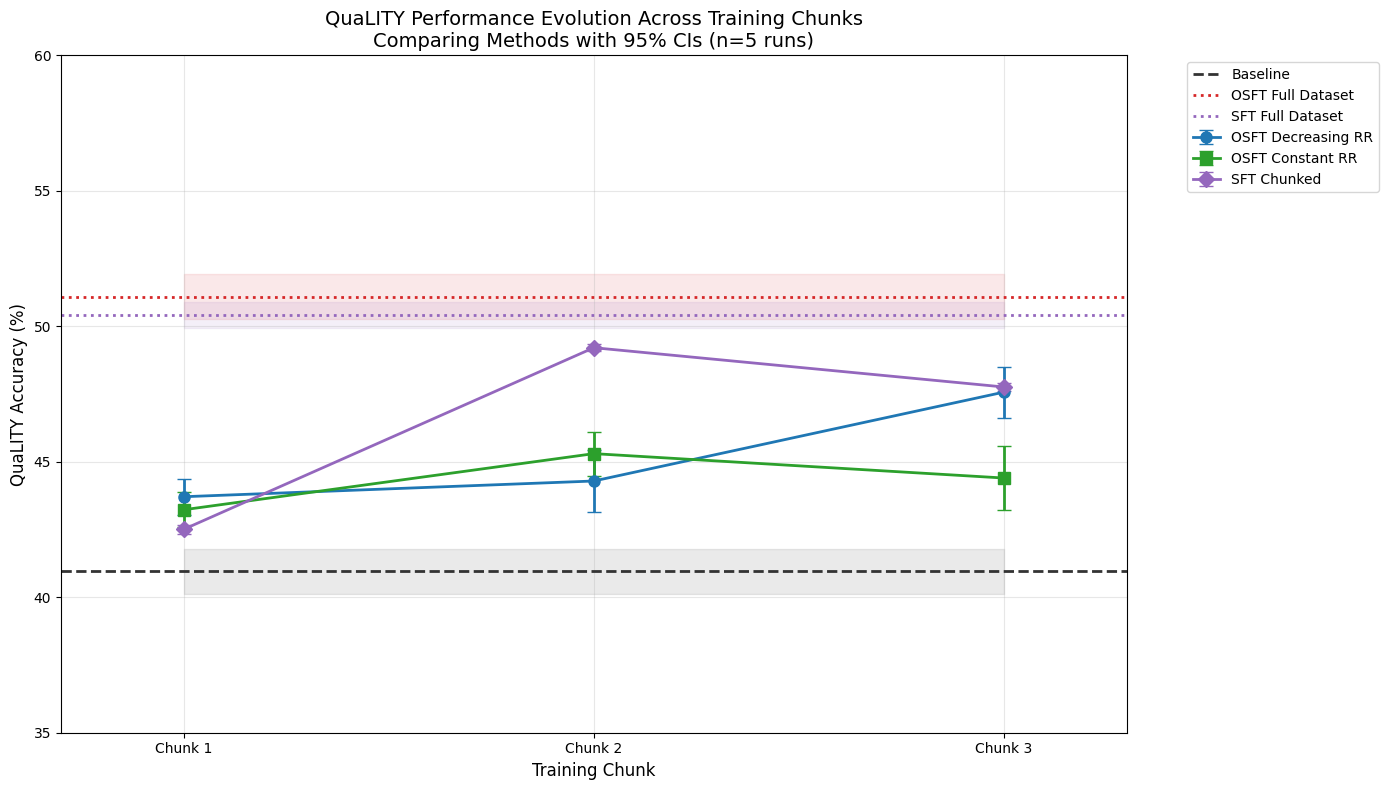

In [6]:
# Plot 2 (UPDATED): Overall performance on QuaLITY over time with 95% CIs
plt.figure(figsize=(14, 8))

# Get baseline value with 95% CI
baseline_mean, baseline_ci = get_data_with_ci(df, {
    'experiment': 'baseline', 'dataset_type': 'default'
})

# Plot baseline as a horizontal line with 95% CI shaded region
plt.axhline(y=baseline_mean, color='#333333', linestyle='--', linewidth=2, label='Baseline')
plt.fill_between([0, 2], baseline_mean - baseline_ci, baseline_mean + baseline_ci, 
                 color='#333333', alpha=0.1)

# Define chunk positions
chunks = [0, 1, 2]

# Track lines for different methods
lines_data = {
    'OSFT Decreasing RR': {'color': '#1f77b4', 'marker': 'o', 'linestyle': '-'},
    'OSFT Constant RR': {'color': '#2ca02c', 'marker': 's', 'linestyle': '-'},
    'SFT Chunked': {'color': '#9467bd', 'marker': 'D', 'linestyle': '-'},
}

# Plot temporal data for each method (using 5e-6 learning rate)
for method_name, style in lines_data.items():
    means = []
    cis = []
    
    if 'OSFT Decreasing' in method_name:
        for chunk in chunks:
            exp_name = f'osft-chunked-decreasing-chunk{chunk}'
            mean, ci = get_data_with_ci(df, {
                'experiment': exp_name, 'dataset_type': 'default'
            })
            if mean > 0:
                means.append(mean)
                cis.append(ci)
    
    elif 'OSFT Constant' in method_name:
        for chunk in chunks:
            exp_name = f'osft-chunked-chunk{chunk}'
            mean, ci = get_data_with_ci(df, {
                'experiment': exp_name, 'dataset_type': 'default'
            })
            if mean > 0:
                means.append(mean)
                cis.append(ci)
    
    elif 'SFT Chunked' in method_name:
        for chunk in chunks:
            exp_name = f'sft-chunked-chunk{chunk}'
            mean, ci = get_data_with_ci(df, {
                'experiment': exp_name, 'dataset_type': 'default'
            })
            if mean > 0:
                means.append(mean)
                cis.append(ci)
    
    if means:
        # Plot line with 95% CI error bars
        means = np.array(means)
        cis = np.array(cis)
        plt.errorbar(chunks[:len(means)], means, yerr=cis, 
                    color=style['color'], marker=style['marker'], 
                    linestyle=style['linestyle'], markersize=8, linewidth=2,
                    capsize=5, label=method_name)


# OSFT Full
osft_full_mean, osft_full_ci = get_data_with_ci(df, {
    'experiment': 'osft-full', 'dataset_type': 'default'
})
plt.axhline(y=osft_full_mean, color='#d62728', linestyle=':', linewidth=2,
            label='OSFT Full Dataset')
plt.fill_between([0, 2], osft_full_mean - osft_full_ci, 
                 osft_full_mean + osft_full_ci, 
                 color='#d62728', alpha=0.1)

# SFT Full
sft_full_mean, sft_full_ci = get_data_with_ci(df, {
    'lr': '5e-6', 'experiment': 'sft-full', 'dataset_type': 'default'
})
plt.axhline(y=sft_full_mean, color='#9467bd', linestyle=':', linewidth=2,
            label='SFT Full Dataset')
plt.fill_between([0, 2], sft_full_mean - sft_full_ci, 
                 sft_full_mean + sft_full_ci, 
                 color='#9467bd', alpha=0.1)

plt.xlabel('Training Chunk', fontsize=12)
plt.ylabel('QuaLITY Accuracy (%)', fontsize=12)
plt.title('QuaLITY Performance Evolution Across Training Chunks\nComparing Methods with 95% CIs (n=5 runs)', fontsize=14)
plt.xticks([0, 1, 2], ['Chunk 1', 'Chunk 2', 'Chunk 3'])
plt.xlim(-0.3, 2.3)  # Tighter x-axis limits since horizontal lines don't need extra space
plt.ylim(35, 60)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# old cumulative plot

![plot.png](./old-cumulitive-performance.png)


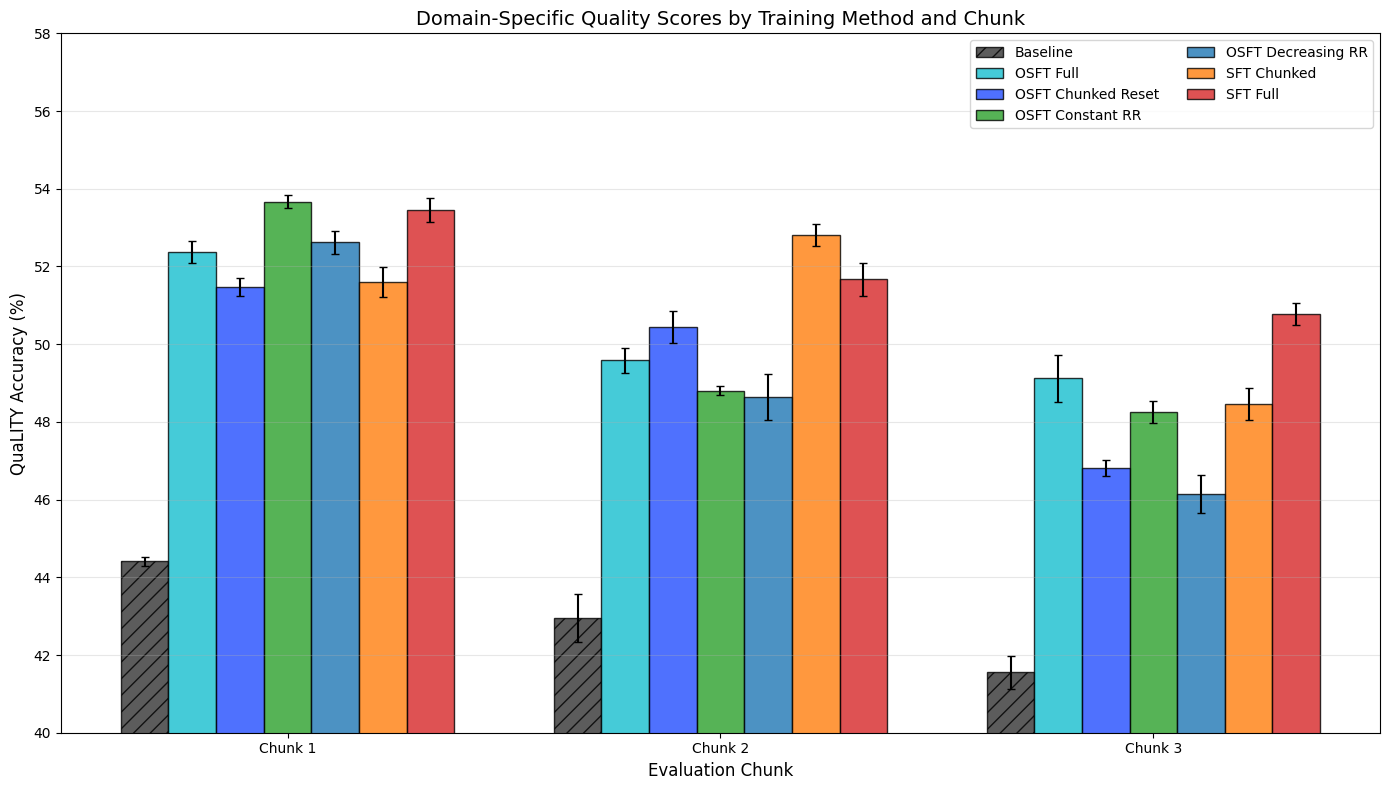

In [35]:
# Plot 3: Domain-specific single chunk quality per experiment
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Get single-chunk data
single_chunk_data = df[df['dataset_type'] == 'single-chunk']

# Define chunks
chunks = [0, 1, 2]
chunk_labels = ['Chunk 1', 'Chunk 2', 'Chunk 3']

# Define methods (all use 5e-6)
methods = [
    ('baseline', 'Baseline', '#333333'),  # No LR needed for baseline
    ('osft-full', 'OSFT Full', '#17becf'),
    ('osft-chunked-reset', 'OSFT Chunked Reset', '#234dfe'),
    ('osft-chunked', 'OSFT Constant RR', '#2ca02c'),
    ('osft-chunked-decreasing', 'OSFT Decreasing RR', '#1f77b4'),
    ('sft-chunked', 'SFT Chunked', '#ff7f0e'),
    ('sft-full', 'SFT Full', '#d62728'),
]

bar_width = 0.11  # reduced from 0.15 to fit 7 methods without overlap
n_methods = len(methods)
x = np.arange(len(chunks))
bar_index = 0

for method_base, method_label, color in methods:
    means = []
    stds = []
    
    for chunk in chunks:
        # if method_base == 'baseline':
        #     exp_name = f'baseline-chunk{chunk}'
        #     data = single_chunk_data[single_chunk_data['experiment'] == exp_name]
        # else:
        exp_name = f'{method_base}-chunk{chunk}'
        data = single_chunk_data[single_chunk_data['experiment'] == exp_name]
        
        if len(data) > 0:
            means.append(data.iloc[0]['mean'] * 100)
            stds.append(data.iloc[0]['std'] * 100)
        else:
            means.append(0)
            stds.append(0)
    
    # Apply styling consistent with forward/backward transfer plots
    if method_base == 'baseline':
        bars = ax.bar(x + bar_index * bar_width - (n_methods-1)*bar_width/2, 
                      means, bar_width, yerr=stds, capsize=3,
                      label=method_label, color=color, alpha=0.8, 
                      edgecolor='black', hatch='//')
    else:
        bars = ax.bar(x + bar_index * bar_width - (n_methods-1)*bar_width/2, 
                      means, bar_width, yerr=stds, capsize=3,
                      label=method_label, color=color, alpha=0.8, 
                      edgecolor='black')
    bar_index += 1

ax.set_xlabel('Evaluation Chunk', fontsize=12)
ax.set_ylabel('QuaLITY Accuracy (%)', fontsize=12)
ax.set_title('Domain-Specific Quality Scores by Training Method and Chunk', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(chunk_labels)
ax.legend(loc='upper right', ncol=2)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(40, 58)

plt.tight_layout()
plt.show()


# Old domain specific quality plot

![old plot](./old-domain-specific.png)

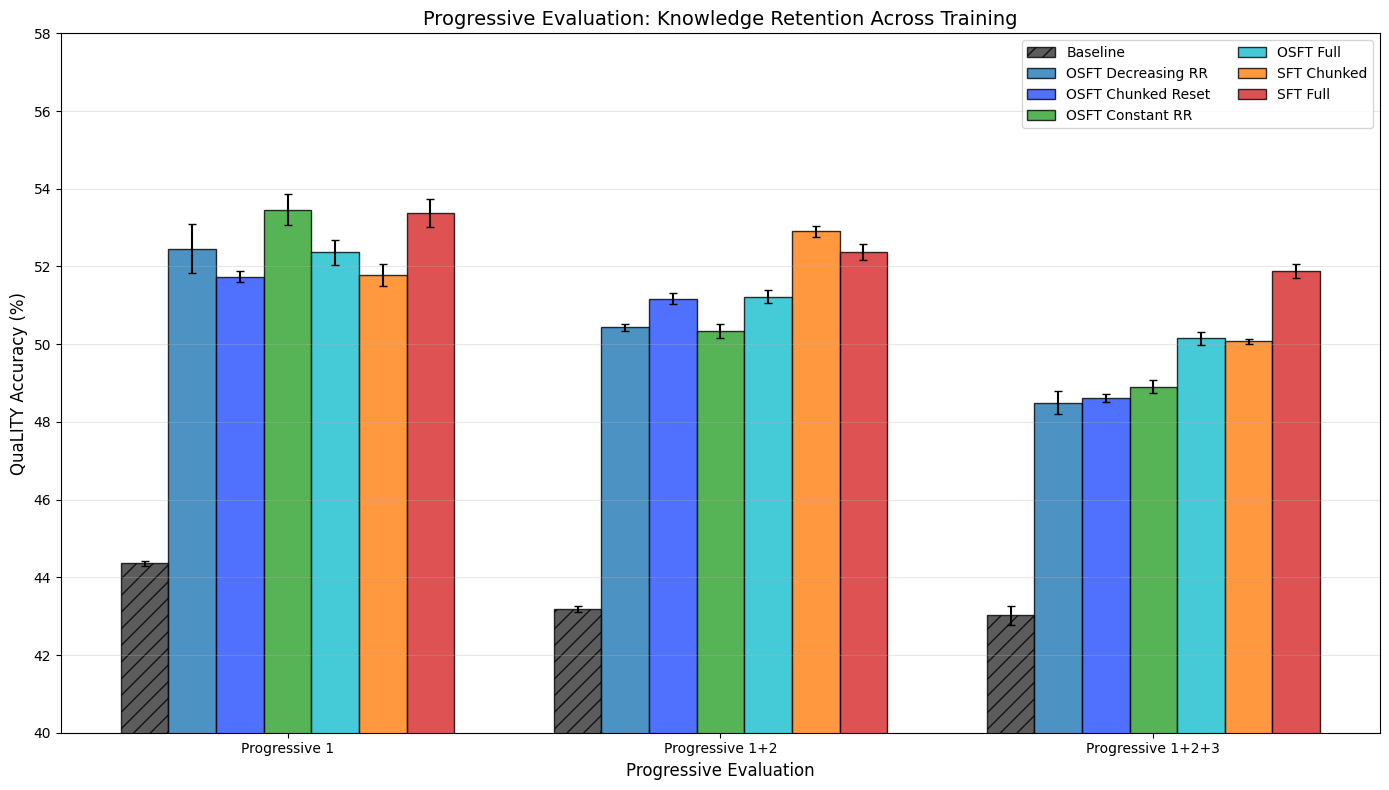

In [34]:
# Plot 4: Progressive quality performance
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Get progressive data
progressive_data = df[df['dataset_type'] == 'progressive']

# Define progressive evaluation points
prog_chunks = [0, 1, 2]
prog_labels = ['Progressive 1', 'Progressive 1+2', 'Progressive 1+2+3']

# Define methods (all use 5e-6)
methods = [
    ('baseline', 'Baseline', '#333333'),
    ('osft-chunked-decreasing', 'OSFT Decreasing RR', '#1f77b4'),
    ('osft-chunked-reset', 'OSFT Chunked Reset', '#234dfe'),
    ('osft-chunked', 'OSFT Constant RR', '#2ca02c'),
    ('osft-full', 'OSFT Full', '#17becf'),
    ('sft-chunked', 'SFT Chunked', '#ff7f0e'),
    ('sft-full', 'SFT Full', '#d62728'),
]

bar_width = 0.11
n_methods = len(methods)
x = np.arange(len(prog_chunks))
bar_index = 0

for method_base, method_label, color in methods:
    means = []
    stds = []
    
    for chunk in prog_chunks:
        exp_name = f'{method_base}-chunk{chunk}'
        data = progressive_data[(progressive_data['experiment'] == exp_name) & 
                              (progressive_data['chunk'] == chunk)]
        
        if len(data) > 0:
            means.append(data.iloc[0]['mean'] * 100)
            stds.append(data.iloc[0]['std'] * 100)
        else:
            means.append(0)
            stds.append(0)
    
    # Apply styling consistent with forward/backward transfer plots
    if method_base == 'baseline':
        bars = ax.bar(x + bar_index * bar_width - (n_methods-1)*bar_width/2, 
                      means, bar_width, yerr=stds, capsize=3,
                      label=method_label, color=color, alpha=0.8, 
                      edgecolor='black', hatch='//')
    else:
        bars = ax.bar(x + bar_index * bar_width - (n_methods-1)*bar_width/2, 
                      means, bar_width, yerr=stds, capsize=3,
                      label=method_label, color=color, alpha=0.8, 
                      edgecolor='black')
    bar_index += 1

ax.set_xlabel('Progressive Evaluation', fontsize=12)
ax.set_ylabel('QuaLITY Accuracy (%)', fontsize=12)
ax.set_title('Progressive Evaluation: Knowledge Retention Across Training', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(prog_labels)
ax.legend(loc='upper right', ncol=2)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(40, 58)

plt.tight_layout()
plt.show()


# Old progressive evaluation plot

![old plot](./old-progressive-evaluation.png)

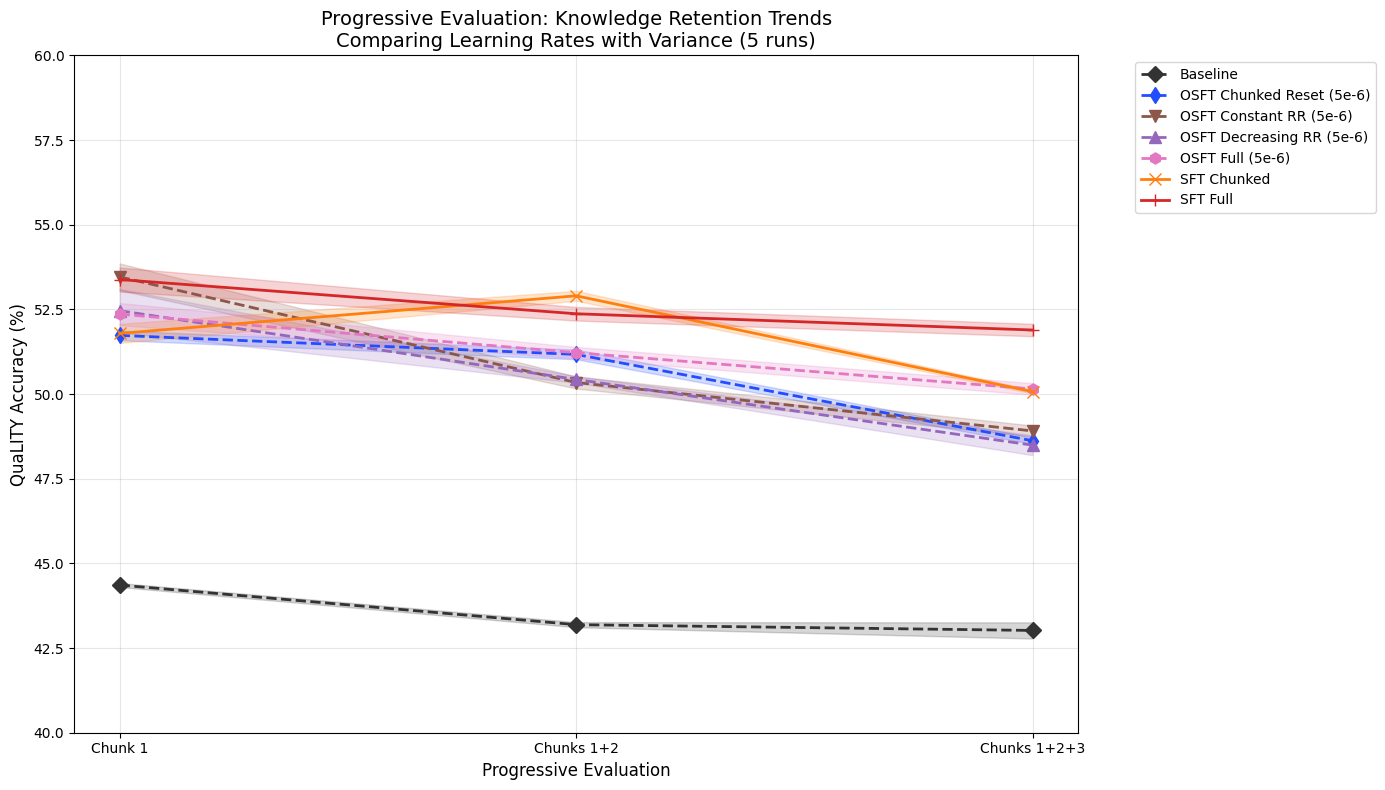

In [33]:
# Plot 5: Progressive quality performance, temporal (line plot with error bands)
plt.figure(figsize=(14, 8))

# Get progressive data
progressive_data = df[df['dataset_type'] == 'progressive']

# Progressive evaluation points
prog_chunks = [0, 1, 2]
x_labels = ['Chunk 1', 'Chunks 1+2', 'Chunks 1+2+3']

# Track lines for different methods
lines_data = {
    'Baseline': {'color': '#333333', 'marker': 'D', 'linestyle': '--', 'lr': None},
    'OSFT Decreasing RR (2e-5)': {'color': '#1f77b4', 'marker': 'o', 'linestyle': '-', 'lr': '2e-5'},
    'OSFT Constant RR (2e-5)': {'color': '#2ca02c', 'marker': 's', 'linestyle': '-', 'lr': '2e-5'},
    'OSFT Full (2e-5)': {'color': '#17becf', 'marker': 'p', 'linestyle': '-', 'lr': '2e-5'},
    'OSFT Chunked Reset (5e-6)': {'color': '#234dfe', 'marker': 'd', 'linestyle': '--', 'lr': '5e-6'},
    'OSFT Constant RR (5e-6)': {'color': '#8c564b', 'marker': 'v', 'linestyle': '--', 'lr': '5e-6'},
    'OSFT Decreasing RR (5e-6)': {'color': '#9467bd', 'marker': '^', 'linestyle': '--', 'lr': '5e-6'},
    'OSFT Full (5e-6)': {'color': '#e377c2', 'marker': 'h', 'linestyle': '--', 'lr': '5e-6'},
    'SFT Chunked': {'color': '#ff7f0e', 'marker': 'x', 'linestyle': '-', 'lr': '2e-5'},
    'SFT Full': {'color': '#d62728', 'marker': '+', 'linestyle': '-', 'lr': '2e-5'},
}

# Plot each method
for method_name, style in lines_data.items():
    means = []
    stds = []
    
    if 'Baseline' in method_name:
        for chunk in prog_chunks:
            exp_name = f'baseline-chunk{chunk}'
            data = progressive_data[(progressive_data['experiment'] == exp_name) & 
                                  (progressive_data['chunk'] == chunk)]
            if len(data) > 0:
                means.append(data.iloc[0]['mean'] * 100)
                stds.append(data.iloc[0]['std'] * 100)

    elif 'OSFT Chunked Reset' in method_name:
        lr = style['lr']
        for chunk in prog_chunks:
            exp_name = f'osft-chunked-reset-chunk{chunk}'
            data = progressive_data[(progressive_data['experiment'] == exp_name) & 
                                  (progressive_data['chunk'] == chunk) &
                                  (progressive_data['lr'] == lr)]
            if len(data) > 0:
                means.append(data.iloc[0]['mean'] * 100)
                stds.append(data.iloc[0]['std'] * 100)
    
    elif 'OSFT Decreasing' in method_name:
        lr = style['lr']
        for chunk in prog_chunks:
            exp_name = f'osft-chunked-decreasing-chunk{chunk}'
            data = progressive_data[(progressive_data['experiment'] == exp_name) & 
                                  (progressive_data['chunk'] == chunk) &
                                  (progressive_data['lr'] == lr)]
            if len(data) > 0:
                means.append(data.iloc[0]['mean'] * 100)
                stds.append(data.iloc[0]['std'] * 100)
    
    elif 'OSFT Constant' in method_name:
        lr = style['lr']
        for chunk in prog_chunks:
            exp_name = f'osft-chunked-chunk{chunk}'
            data = progressive_data[(progressive_data['experiment'] == exp_name) & 
                                  (progressive_data['chunk'] == chunk) &
                                  (progressive_data['lr'] == lr)]
            if len(data) > 0:
                means.append(data.iloc[0]['mean'] * 100)
                stds.append(data.iloc[0]['std'] * 100)
    
    elif 'OSFT Full' in method_name:
        lr = style['lr']
        for chunk in prog_chunks:
            exp_name = f'osft-full-chunk{chunk}'
            data = progressive_data[(progressive_data['experiment'] == exp_name) & 
                                  (progressive_data['chunk'] == chunk) &
                                  (progressive_data['lr'] == lr)]
            if len(data) > 0:
                means.append(data.iloc[0]['mean'] * 100)
                stds.append(data.iloc[0]['std'] * 100)
    
    elif 'SFT Chunked' in method_name:
        for chunk in prog_chunks:
            exp_name = f'sft-chunked-chunk{chunk}'
            data = progressive_data[(progressive_data['experiment'] == exp_name) & 
                                  (progressive_data['chunk'] == chunk) &
                                  (progressive_data['lr'] == '5e-6')]
            if len(data) > 0:
                means.append(data.iloc[0]['mean'] * 100)
                stds.append(data.iloc[0]['std'] * 100)
    
    elif 'SFT Full' in method_name:
        for chunk in prog_chunks:
            exp_name = f'sft-full-chunk{chunk}'
            data = progressive_data[(progressive_data['experiment'] == exp_name) & 
                                  (progressive_data['chunk'] == chunk) &
                                  (progressive_data['lr'] == '5e-6')]
            if len(data) > 0:
                means.append(data.iloc[0]['mean'] * 100)
                stds.append(data.iloc[0]['std'] * 100)
    
    if means:
        means = np.array(means)
        stds = np.array(stds)
        x = np.arange(len(means))
        
        # Plot line with error band
        plt.plot(x, means, color=style['color'], marker=style['marker'], 
                linestyle=style['linestyle'], markersize=8, linewidth=2, 
                label=method_name)
        plt.fill_between(x, means - stds, means + stds, 
                        color=style['color'], alpha=0.2)

plt.xlabel('Progressive Evaluation', fontsize=12)
plt.ylabel('QuaLITY Accuracy (%)', fontsize=12)
plt.title('Progressive Evaluation: Knowledge Retention Trends\nComparing Learning Rates with Variance (5 runs)', fontsize=14)
plt.xticks(range(len(x_labels)), x_labels)
plt.xlim(-0.1, len(x_labels) - 0.9)
plt.ylim(40, 60)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Old progressive quality plot

![old plot](./old-progressive-retention.png)

Baseline chunk 0: mean=44.41%, CI=±0.14%
Baseline chunk 1: mean=42.95%, CI=±0.76%


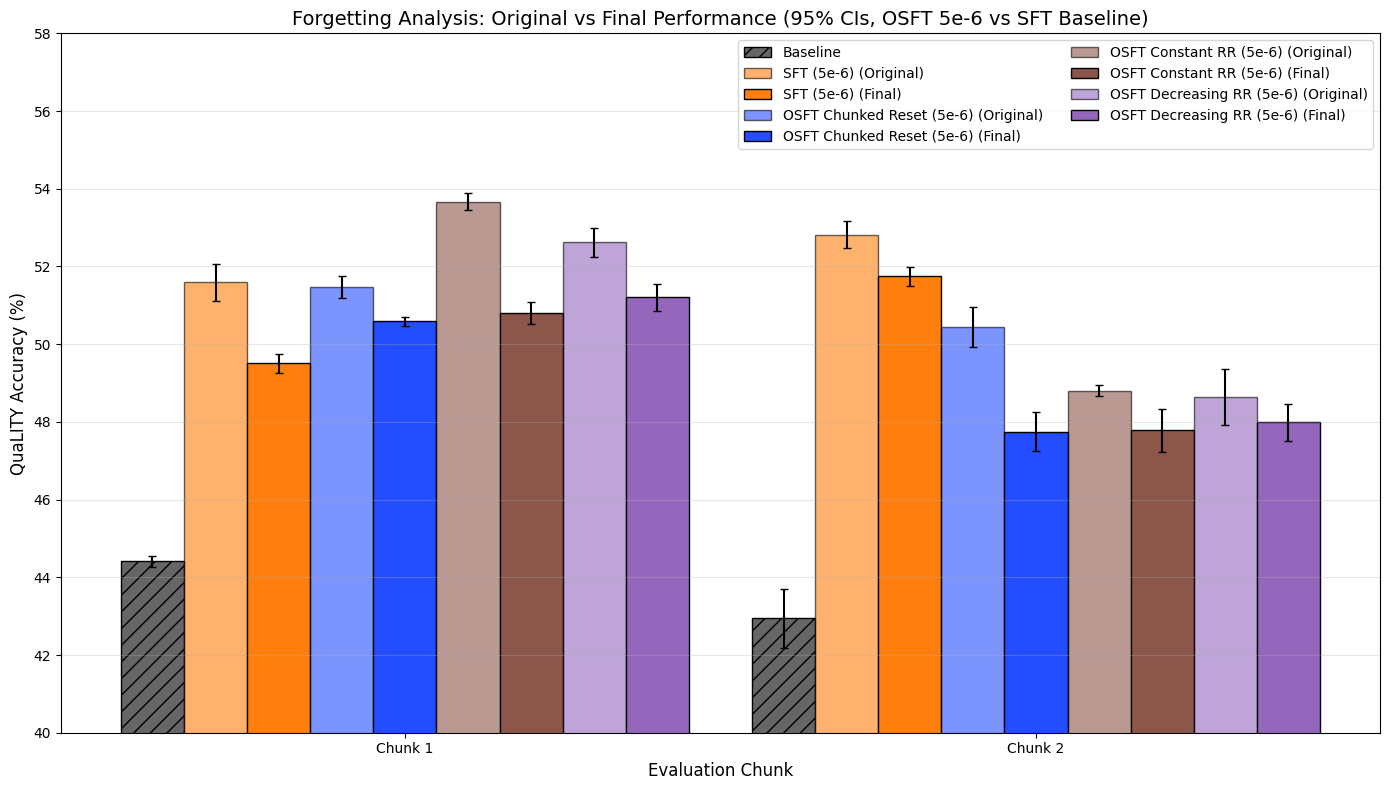

In [32]:
# Plot 6b (UPDATED): Forgetting Analysis - 5e-6 Learning Rate with 95% CIs
fig, ax = plt.subplots(figsize=(14, 8))
# Define the evaluation chunks we have data for
eval_chunks = [0, 1]  # chunk 0 and chunk 1
chunk_labels = ['Chunk 1', 'Chunk 2']


# Get original and final performance for each method with 95% CIs
def get_forgetting_data_with_ci(lr, method_base, experiment_name):
    """Extract original and final performance with 95% CIs for a given method"""
    original_scores = []
    original_cis = []
    final_scores = []
    final_cis = []
    
    for chunk in eval_chunks:
        # Original score (single-chunk evaluation)
        original_exp = f'{method_base}-chunk{chunk}' if method_base != 'sft-chunked' else f'sft-chunked-chunk{chunk}'
        
        # Debug: Check what data we're looking for
        filtered = df_with_forgetting[
            (df_with_forgetting['lr'] == lr) & 
            (df_with_forgetting['dataset_type'] == 'single-chunk') & 
            (df_with_forgetting['experiment'] == original_exp)
        ]
        
        if len(filtered) == 0:
            # Try without lr filter for baseline-like experiments
            filtered = df_with_forgetting[
                (df_with_forgetting['dataset_type'] == 'single-chunk') & 
                (df_with_forgetting['experiment'] == original_exp)
            ]
        
        if len(filtered) > 0:
            row = filtered.iloc[0]
            original_mean = row['mean'] * 100
            original_ci = row['ci_halfwidth'] * 100
        else:
            print(f"Warning: No data found for {lr} {original_exp} single-chunk")
            original_mean = 0
            original_ci = 0
            
        original_scores.append(original_mean)
        original_cis.append(original_ci)
            
        # Final score (forgetting evaluation)
        final_exp = f'{experiment_name}-final-on-chunk{chunk}'
        
        # Use same approach as original scores for consistency
        filtered_final = df_with_forgetting[
            (df_with_forgetting['lr'] == lr) & 
            (df_with_forgetting['dataset_type'] == 'forgetting') & 
            (df_with_forgetting['experiment'] == final_exp)
        ]
        
        if len(filtered_final) > 0:
            row = filtered_final.iloc[0]
            final_mean = row['mean'] * 100
            final_ci = row['ci_halfwidth'] * 100
        else:
            print(f"Warning: No data found for {lr} {final_exp} forgetting")
            final_mean = 0
            final_ci = 0
            
        final_scores.append(final_mean)
        final_cis.append(final_ci)
    
    return original_scores, original_cis, final_scores, final_cis


# Methods for 5e-6 plot (include SFT baselines from 2e-5 for comparison)
methods_5e6 = [
    
    ('sft-chunked', 'sft-chunked', 'SFT (5e-6)', '#ff7f0e', '5e-6'),  # SFT baseline
    ('osft-chunked-reset', 'osft-chunked-reset', 'OSFT Chunked Reset (5e-6)', '#234dfe', '5e-6'),
    ('osft-chunked', 'osft-chunked', 'OSFT Constant RR (5e-6)', '#8c564b', '5e-6'),
    ('osft-chunked-decreasing', 'osft-chunked-decreasing', 'OSFT Decreasing RR (5e-6)', '#9467bd', '5e-6'),
]


# Set up bar positions
bar_width = 0.10
n_methods = len(methods_5e6) + 1  # +1 for baseline
n_scores = 2  # original and final (except baseline which has only 1)
total_bars = len(methods_5e6) * 2 + 1  # methods have 2 bars each, baseline has 1
x = np.arange(len(eval_chunks))

# First, plot baseline as a reference (single bar, no original/final distinction)
baseline_scores = []
baseline_cis = []
for chunk in eval_chunks:
    baseline_exp = f'baseline-chunk{chunk}'
    
    # Check for baseline data
    filtered_baseline = df_with_forgetting[
        (df_with_forgetting['dataset_type'] == 'single-chunk') & 
        (df_with_forgetting['experiment'] == baseline_exp)
    ]
    
    if len(filtered_baseline) > 0:
        row = filtered_baseline.iloc[0]
        baseline_mean = row['mean'] * 100
        baseline_ci = row['ci_halfwidth'] * 100
        print(f"Baseline chunk {chunk}: mean={baseline_mean:.2f}%, CI=±{baseline_ci:.2f}%")
    else:
        print(f"Warning: No baseline data found for {baseline_exp}")
        baseline_mean = 0
        baseline_ci = 0
    
    baseline_scores.append(baseline_mean)
    baseline_cis.append(baseline_ci)

# Plot baseline bars (hatched pattern to distinguish)
bar_index = 0
bars_baseline = ax.bar(x + bar_index * bar_width - (total_bars-1)*bar_width/2, 
                      baseline_scores, bar_width, yerr=baseline_cis, capsize=3,
                      label='Baseline', color='#666666', edgecolor='black', hatch='//')
bar_index += 1

# Plot bars for each method
for method_base, experiment_name, label, color, lr in methods_5e6:
    orig_scores, orig_cis, final_scores, final_cis = get_forgetting_data_with_ci(lr, method_base, experiment_name)
    
    # Original scores (lighter shade)
    bars_orig = ax.bar(x + bar_index * bar_width - (total_bars-1)*bar_width/2, 
                       orig_scores, bar_width, yerr=orig_cis, capsize=3,
                       label=f'{label} (Original)', color=color, alpha=0.6, edgecolor='black')
    bar_index += 1
    
    # Final scores (darker shade)
    bars_final = ax.bar(x + bar_index * bar_width - (total_bars-1)*bar_width/2, 
                        final_scores, bar_width, yerr=final_cis, capsize=3,
                        label=f'{label} (Final)', color=color, alpha=1.0, edgecolor='black')
    bar_index += 1

ax.set_xlabel('Evaluation Chunk', fontsize=12)
ax.set_ylabel('QuaLITY Accuracy (%)', fontsize=12)
ax.set_title('Forgetting Analysis: Original vs Final Performance (95% CIs, OSFT 5e-6 vs SFT Baseline)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(chunk_labels)
ax.legend(loc='upper right', ncol=2)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(40, 58)

plt.tight_layout()
plt.show()


# Old forgetting analysis plot

![old plot](./old-forgetting-analysis.png)

Baseline on target chunk 1: mean=42.95%, CI=±0.76%
Baseline on target chunk 2: mean=41.55%, CI=±0.51%
Baseline on target chunk 2: mean=41.55%, CI=±0.51%

SFT (5e-6) Forward-Transfer (5e-6):
  Forward-transfer scores: [41.44, 42.63, 43.78]
  Forward-transfer CIs: [0.5353147305426973, 0.33901313966275554, 0.5686803865230454]
  Original scores: [52.82, 48.449999999999996, 48.449999999999996]
  Original CIs: [0.3535887433502339, 0.5101801648202332, 0.5101801648202332]

OSFT Chunked Reset (5e-6) Forward-Transfer (5e-6):
  Forward-transfer scores: [41.410000000000004, 41.25, 43.11]
  Forward-transfer CIs: [0.5928563800449489, 0.354698504896765, 0.4129247512271442]
  Original scores: [50.44, 46.82, 46.82]
  Original CIs: [0.5052319999999988, 0.2596710226421117, 0.2596710226421117]

OSFT Constant RR (5e-6) Forward-Transfer (5e-6):
  Forward-transfer scores: [43.86, 42.38, 41.0]
  Forward-transfer CIs: [0.5989087310233515, 0.5546028388531737, 0.554602838853173]
  Original scores: [48.8, 48.25, 

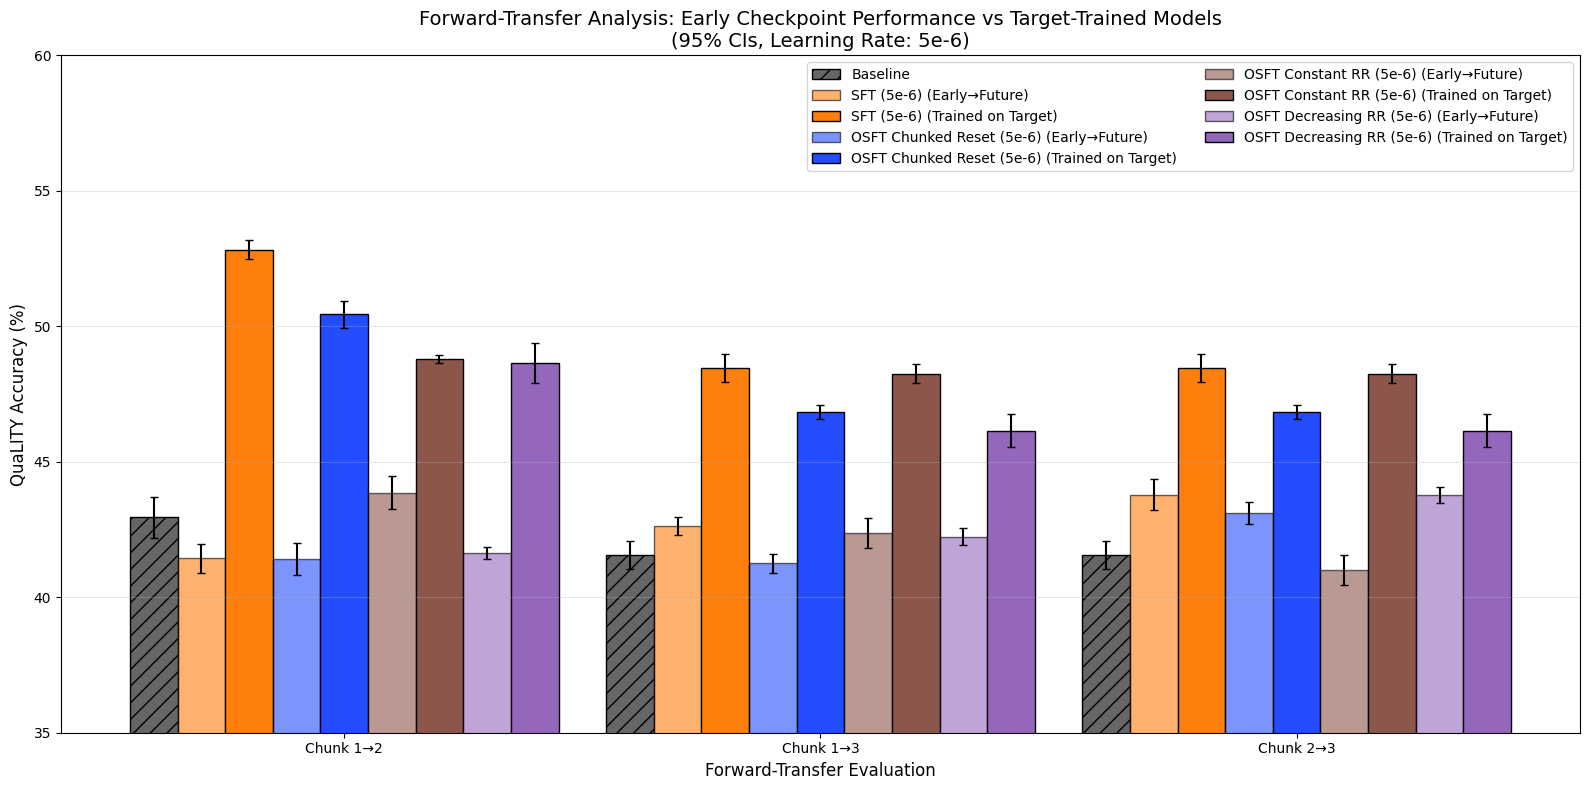

In [31]:
# Plot 6d: Forward-Transfer Analysis - 5e-6 Learning Rate
fig, ax = plt.subplots(figsize=(16, 8))

def get_forward_transfer_data_with_ci(lr, method_base, experiment_name):
    """Extract forward-transfer and original performance with 95% CIs for comparison"""
    forward_transfer_scores = []
    forward_transfer_cis = []
    original_scores = []
    original_cis = []
    
    # Define the forward-transfer evaluations we want
    evaluations = [
        ('chunk0-on-chunk1', 0, 1),  # Chunk 1 checkpoint on Chunk 2 data
        ('chunk0-on-chunk2', 0, 2),  # Chunk 1 checkpoint on Chunk 3 data  
        ('chunk1-on-chunk2', 1, 2),  # Chunk 2 checkpoint on Chunk 3 data
    ]
    
    for eval_name, train_chunk, eval_chunk in evaluations:
        # Forward-transfer score (early checkpoint on future chunk)
        forward_exp = f'{experiment_name}-{eval_name}'
        filtered_forward = df_with_forgetting[
            (df_with_forgetting['lr'] == lr) & 
            (df_with_forgetting['dataset_type'] == 'forward-transfer') & 
            (df_with_forgetting['experiment'] == forward_exp)
        ]
        
        if len(filtered_forward) == 0 and method_base.startswith('sft'):
            # Try without lr filter for SFT experiments (might be mislabeled)
            filtered_forward = df_with_forgetting[
                (df_with_forgetting['dataset_type'] == 'forward-transfer') & 
                (df_with_forgetting['experiment'] == forward_exp)
            ]
        
        if len(filtered_forward) > 0:
            row = filtered_forward.iloc[0]
            forward_mean = row['mean'] * 100
            forward_ci = row['ci_halfwidth'] * 100
        else:
            print(f"Warning: No forward-transfer data found for {lr} {forward_exp}")
            forward_mean = 0
            forward_ci = 0
            
        forward_transfer_scores.append(forward_mean)
        forward_transfer_cis.append(forward_ci)
        
        # Original score (model trained specifically on that chunk)
        original_exp = f'{method_base}-chunk{eval_chunk}' if method_base != 'sft-chunked' else f'sft-chunked-chunk{eval_chunk}'
        filtered_original = df_with_forgetting[
            (df_with_forgetting['lr'] == lr) & 
            (df_with_forgetting['dataset_type'] == 'single-chunk') & 
            (df_with_forgetting['experiment'] == original_exp)
        ]
        
        if len(filtered_original) == 0 and method_base.startswith('sft'):
            # Try without lr filter for SFT experiments (might be mislabeled)
            filtered_original = df_with_forgetting[
                (df_with_forgetting['dataset_type'] == 'single-chunk') & 
                (df_with_forgetting['experiment'] == original_exp)
            ]
        
        if len(filtered_original) > 0:
            row = filtered_original.iloc[0]
            original_mean = row['mean'] * 100
            original_ci = row['ci_halfwidth'] * 100
        else:
            print(f"Warning: No original data found for {lr} {original_exp}")
            original_mean = 0
            original_ci = 0
            
        original_scores.append(original_mean)
        original_cis.append(original_ci)
    
    return forward_transfer_scores, forward_transfer_cis, original_scores, original_cis

# Check if we actually have forward-transfer data for 5e-6
has_5e6_ft_data = df_with_forgetting[
    (df_with_forgetting['lr'] == '5e-6') & 
    (df_with_forgetting['dataset_type'] == 'forward-transfer')
]


if len(has_5e6_ft_data) == 0:
    print("WARNING: No forward-transfer data found for learning rate 5e-6")
    print("This plot may show empty or incorrect data.")

# Methods for 5e-6 plot (include SFT which also ran at 5e-6)
methods_5e6_ft = [
    ('sft-chunked', 'sft-chunked', 'SFT (5e-6)', '#ff7f0e', '5e-6'),
    ('osft-chunked-reset', 'osft-chunked-reset', 'OSFT Chunked Reset (5e-6)', '#234dfe', '5e-6'),
    ('osft-chunked', 'osft-chunked', 'OSFT Constant RR (5e-6)', '#8c564b', '5e-6'),
    ('osft-chunked-decreasing', 'osft-chunked-decreasing', 'OSFT Decreasing RR (5e-6)', '#9467bd', '5e-6'),
]

# Set up bar positions
eval_labels = ['Chunk 1→2', 'Chunk 1→3', 'Chunk 2→3']
bar_width = 0.10
n_methods = len(methods_5e6_ft) + 1  # +1 for baseline
n_scores = 2  # forward-transfer and original (baseline has only 1)
total_bars = len(methods_5e6_ft) * 2 + 1  # methods have 2 bars each, baseline has 1
x = np.arange(len(eval_labels))

# First, plot baseline performance on target chunks
baseline_target_scores = []
baseline_target_cis = []
target_chunks = [1, 2, 2]  # Chunk 2, Chunk 3, Chunk 3 for the three evaluations

for target_chunk in target_chunks:
    baseline_exp = f'baseline-chunk{target_chunk}'
    filtered_baseline = df_with_forgetting[
        (df_with_forgetting['dataset_type'] == 'single-chunk') & 
        (df_with_forgetting['experiment'] == baseline_exp)
    ]
    
    if len(filtered_baseline) > 0:
        row = filtered_baseline.iloc[0]
        baseline_mean = row['mean'] * 100
        baseline_ci = row['ci_halfwidth'] * 100
        print(f"Baseline on target chunk {target_chunk}: mean={baseline_mean:.2f}%, CI=±{baseline_ci:.2f}%")
    else:
        print(f"Warning: No baseline data found for {baseline_exp}")
        baseline_mean = 0
        baseline_ci = 0
    
    baseline_target_scores.append(baseline_mean)
    baseline_target_cis.append(baseline_ci)


# Plot baseline bars first (reuse from 2e-5 plot)
bar_index = 0
bars_baseline = ax.bar(x + bar_index * bar_width - (total_bars-1)*bar_width/2, 
                      baseline_target_scores, bar_width, yerr=baseline_target_cis, capsize=3,
                      label='Baseline', color='#666666', edgecolor='black', hatch='//')
bar_index += 1

# Plot bars for each method
for method_base, experiment_name, label, color, lr in methods_5e6_ft:
    ft_scores, ft_cis, orig_scores, orig_cis = get_forward_transfer_data_with_ci(lr, method_base, experiment_name)
    
    # Debug: Print the values
    print(f"\n{label} Forward-Transfer ({lr}):")
    print(f"  Forward-transfer scores: {ft_scores}")
    print(f"  Forward-transfer CIs: {ft_cis}")
    print(f"  Original scores: {orig_scores}")
    print(f"  Original CIs: {orig_cis}")
    
    # Only plot if we have data
    if any(score > 0 for score in ft_scores) or any(score > 0 for score in orig_scores):
        # Forward-transfer scores (lighter shade)
        bars_ft = ax.bar(x + bar_index * bar_width - (total_bars-1)*bar_width/2, 
                         ft_scores, bar_width, yerr=ft_cis, capsize=3,
                         label=f'{label} (Early→Future)', color=color, alpha=0.6, edgecolor='black')
        bar_index += 1
        
        # Original scores (darker shade)
        bars_orig = ax.bar(x + bar_index * bar_width - (total_bars-1)*bar_width/2, 
                           orig_scores, bar_width, yerr=orig_cis, capsize=3,
                           label=f'{label} (Trained on Target)', color=color, alpha=1.0, edgecolor='black')
        bar_index += 1
    else:
        print(f"  WARNING: No valid data found for {label}, skipping bars")
        # Still increment bar_index to maintain spacing
        bar_index += 2

ax.set_xlabel('Forward-Transfer Evaluation', fontsize=12)
ax.set_ylabel('QuaLITY Accuracy (%)', fontsize=12)
# Check if we have any data to display
has_data = bar_index > 1  # More than just baseline
if has_data:
    ax.set_title('Forward-Transfer Analysis: Early Checkpoint Performance vs Target-Trained Models\n(95% CIs, Learning Rate: 5e-6)', fontsize=14)
else:
    ax.set_title('Forward-Transfer Analysis: Early Checkpoint Performance vs Target-Trained Models\n(95% CIs, Learning Rate: 5e-6)\nNote: No forward-transfer data available', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(eval_labels)
ax.legend(loc='upper right', ncol=2)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(35, 60)

plt.tight_layout()
plt.show()


# Old forward transfer evaluation


![old plot](./forward-transfer-old.png)

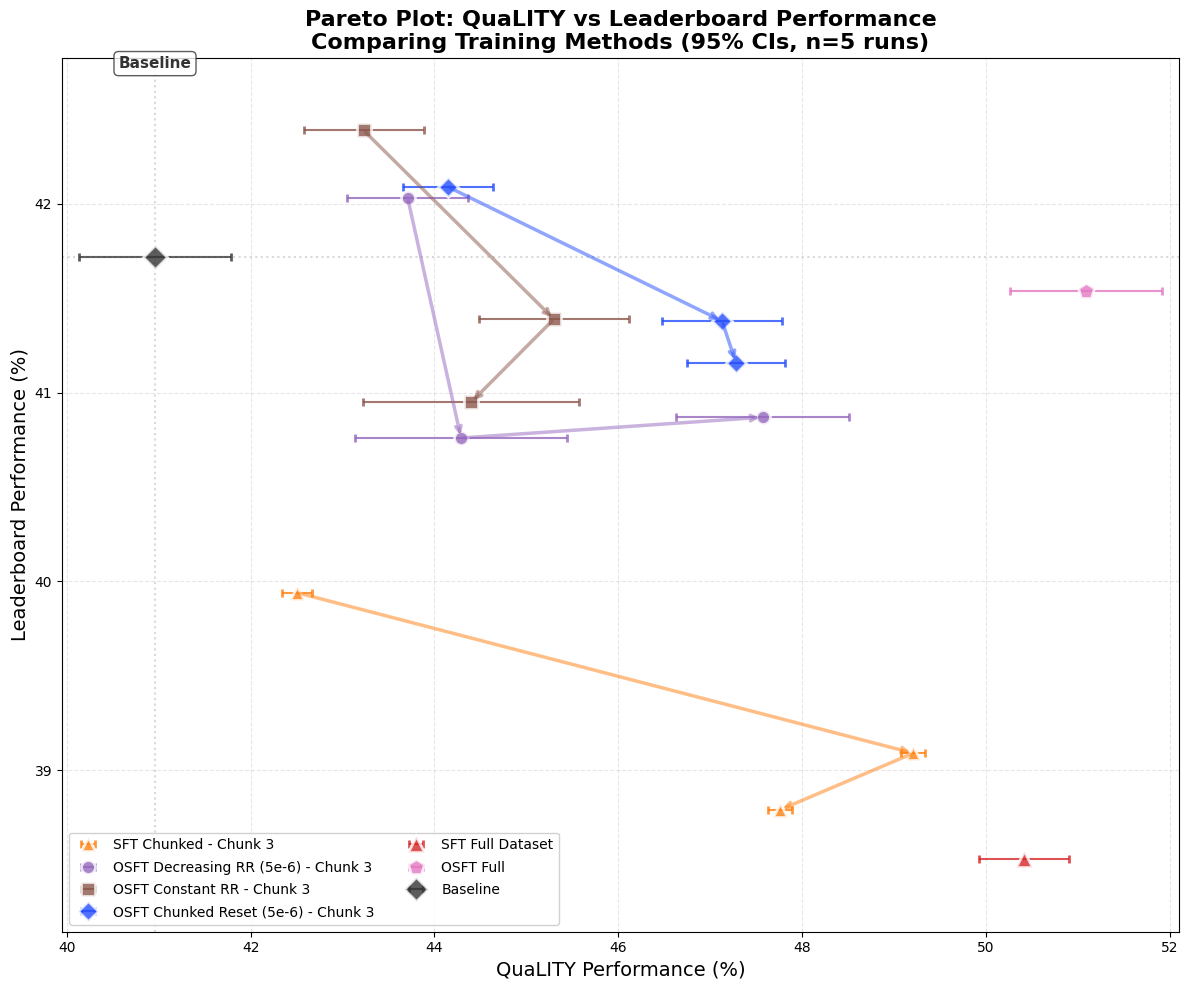


QuaLITY vs Leaderboard Performance Summary:
Baseline: QuaLITY=41.0%, Leaderboard=41.7%

Final Methods ranked by QuaLITY performance:
  OSFT Full: QuaLITY=51.1%, Leaderboard=41.5%
  SFT Full Dataset: QuaLITY=50.4%, Leaderboard=38.5%
  SFT Chunked - Final: QuaLITY=47.8%, Leaderboard=38.8%
  OSFT Decreasing RR (5e-6) - Final: QuaLITY=47.6%, Leaderboard=40.9%
  OSFT Chunked Reset (5e-6) - Final: QuaLITY=47.3%, Leaderboard=41.2%
  OSFT Constant RR - Final: QuaLITY=44.4%, Leaderboard=41.0%
  Baseline: QuaLITY=41.0%, Leaderboard=41.7%

Final Methods ranked by Leaderboard performance:
  Baseline: QuaLITY=41.0%, Leaderboard=41.7%
  OSFT Full: QuaLITY=51.1%, Leaderboard=41.5%
  OSFT Chunked Reset (5e-6) - Final: QuaLITY=47.3%, Leaderboard=41.2%
  OSFT Constant RR - Final: QuaLITY=44.4%, Leaderboard=41.0%
  OSFT Decreasing RR (5e-6) - Final: QuaLITY=47.6%, Leaderboard=40.9%
  SFT Chunked - Final: QuaLITY=47.8%, Leaderboard=38.8%
  SFT Full Dataset: QuaLITY=50.4%, Leaderboard=38.5%


In [23]:
# Plot 9: Pareto Plot - QuaLITY vs Leaderboard Performance
fig, ax = plt.subplots(figsize=(12, 10))

def get_quality_performance(lr, method_base, chunk=None):
    """Get final QuaLITY performance for a method"""
    if chunk is not None:
        exp_name = f'{method_base}-chunk{chunk}' if method_base != 'sft-chunked' else f'sft-chunked-chunk{chunk}'
    else:
        exp_name = method_base  # for full dataset methods
    
    # Handle baseline case (it's stored with lr='2e-5')
    if method_base == 'baseline' or lr is None:
        filters = {'dataset_type': 'default', 'experiment': exp_name}
    else:
        filters = {'lr': lr, 'dataset_type': 'default', 'experiment': exp_name}
    
    mean, _ = get_data_with_ci(df_with_forgetting, filters)
    return mean

def get_leaderboard_performance(method_key):
    """Get leaderboard performance from the data dictionary"""
    return leaderboard_data.get(method_key, 0)

# Create pareto data for QuaLITY vs Leaderboard with trajectories
pareto_data_quality_vs_leaderboard = {}

# Baseline
baseline_quality, baseline_quality_ci = get_data_with_ci(df_with_forgetting, {
    'dataset_type': 'default', 'experiment': 'baseline'
})
baseline_leaderboard = get_leaderboard_performance('Baseline')
pareto_data_quality_vs_leaderboard['Baseline'] = {
    'quality': baseline_quality,
    'leaderboard': baseline_leaderboard,
    'method': 'baseline',
    'marker': 'D',
    'color': '#333333',
    'size': 250
}

# Define chunked methods with trajectories (all chunks 0, 1, 2)
chunked_methods = [
    # 5e-6 methods
    ('sft-chunked', 'SFT Chunked', '#ff7f0e', '^', '5e-6'),
    ('osft-chunked-decreasing', 'OSFT Decreasing RR (5e-6)', '#9467bd', 'o', '5e-6'),
    ('osft-chunked', 'OSFT Constant RR', '#8c564b', 's', '5e-6'),
    ('osft-chunked-reset', 'OSFT Chunked Reset (5e-6)', '#234dfe', 'D', '5e-6'),
]

# Full dataset methods (single points)
full_methods = [
    ('sft-full', 'SFT Full Dataset', 'SFT Full', '#d62728', '^', '5e-6'),
    ('osft-full', 'OSFT Full', 'OSFT Full', '#e377c2', 'p', '5e-6'),
]

# Plot trajectories for chunked methods
for method_base, label_base, color, marker, lr in chunked_methods:
    trajectory_points = []
    
    for chunk in [0, 1, 2]:
        # Get quality performance with CI
        if method_base == 'baseline':
            filters = {'dataset_type': 'default', 'experiment': method_base}
        else:
            exp_name = f'{method_base}-chunk{chunk}' if method_base != 'sft-chunked' else f'sft-chunked-chunk{chunk}'
            filters = {'lr': lr, 'dataset_type': 'default', 'experiment': exp_name}
        
        quality, quality_ci = get_data_with_ci(df_with_forgetting, filters)
        
        # If no data found and it's SFT, try without lr filter (due to mislabeling)
        if quality == 0 and method_base.startswith('sft'):
            filters = {'dataset_type': 'default', 'experiment': exp_name}
            quality, quality_ci = get_data_with_ci(df_with_forgetting, filters)
        
        # Get leaderboard performance
        if method_base == 'sft-chunked':
            leaderboard_key = f'SFT Chunked - Chunk {chunk}'
        elif method_base == 'osft-chunked':
            leaderboard_key = f'OSFT Chunked - Chunk {chunk}'
        elif method_base == 'osft-chunked-decreasing':
            leaderboard_key = f'OSFT Decreasing RR - Chunk {chunk}'
        elif method_base == 'osft-chunked-reset':
            leaderboard_key = f'OSFT Chunked Reset - Chunk {chunk}'
        
        leaderboard = get_leaderboard_performance(leaderboard_key)
        
        if quality > 0 and leaderboard > 0:
            trajectory_points.append((quality, leaderboard))
            
            # Plot point with horizontal error bars for quality CI
            show_label = chunk == 2
            label = f'{label_base} - Chunk {chunk + 1}' if show_label else '_nolegend_'
            
            ax.errorbar(quality, leaderboard, xerr=quality_ci,
                       marker=marker, markersize=10, 
                       color=color, alpha=0.8, 
                       markeredgecolor='white', markeredgewidth=2,
                       capsize=3, capthick=1.5,
                       label=label, linestyle='None')

        """
        Warning: no leaderboard found for 5e-6 osft-chunked-decreasing 0
        Warning: no leaderboard found for 5e-6 osft-chunked-decreasing 1
        Warning: no leaderboard found for 5e-6 osft-chunked-decreasing 2
        Warning: no leaderboard found for 5e-6 osft-chunked 0
        Warning: no leaderboard found for 5e-6 osft-chunked 1
        Warning: no leaderboard found for 5e-6 osft-chunked 2
        """
 
        if quality == 0:
            print(f"Warning: no quality found for {lr} {method_base} {chunk}")
        if leaderboard == 0:
            print(f"Warning: no leaderboard found for {lr} {method_base} {chunk}")
    
    # Add arrows showing progression
    if len(trajectory_points) > 1:
        for i in range(len(trajectory_points)-1):
            ax.annotate('', xy=trajectory_points[i+1], xytext=trajectory_points[i],
                        arrowprops=dict(arrowstyle='->', color=color, alpha=0.5, lw=2.5))

# Plot single points for full dataset methods
for method_base, label, leaderboard_key, color, marker, lr in full_methods:
    quality, quality_ci = get_data_with_ci(df_with_forgetting, {
        'lr': lr, 'dataset_type': 'default', 'experiment': method_base
    })
    
    # If no data found and it's SFT, try without lr filter (due to mislabeling)
    if quality == 0 and method_base.startswith('sft'):
        quality, quality_ci = get_data_with_ci(df_with_forgetting, {
            'dataset_type': 'default', 'experiment': method_base
        })
    
    leaderboard = get_leaderboard_performance(leaderboard_key)
    
    if quality > 0 and leaderboard > 0:
        ax.errorbar(quality, leaderboard, xerr=quality_ci,
                   marker=marker, markersize=12, 
                   color=color, alpha=0.8, 
                   markeredgecolor='white', markeredgewidth=2,
                   capsize=3, capthick=1.5,
                   label=label, linestyle='None')
    
    if quality == 0:
        print(f"Warning: no quality found for {lr} {method_base}")
    if leaderboard == 0:
        print(f"Warning: no leaderboard found for {lr} {method_base}")

# Plot baseline
ax.errorbar(baseline_quality, baseline_leaderboard, xerr=baseline_quality_ci,
           marker='D', markersize=12, 
           color='#333333', alpha=0.8, 
           markeredgecolor='white', markeredgewidth=2,
           capsize=3, capthick=1.5,
           label='Baseline', linestyle='None')

# Add reference lines for baseline
ax.axhline(y=baseline_leaderboard, color='gray', linestyle=':', alpha=0.3, label='_baseline_h')
ax.axvline(x=baseline_quality, color='gray', linestyle=':', alpha=0.3, label='_baseline_v')

# Calculate axis limits with some padding
all_quality = []
all_leaderboard = []

# Collect all points for axis limits
# Baseline
all_quality.append(baseline_quality)
all_leaderboard.append(baseline_leaderboard)

# Chunked methods (all chunks)
for method_base, _, _, _, lr in chunked_methods:
    for chunk in [0, 1, 2]:
        quality = get_quality_performance(lr, method_base, chunk)
        # If no data found and it's SFT, try without lr filter
        if quality == 0 and method_base.startswith('sft'):
            quality = get_quality_performance(None, method_base, chunk)
        
        if method_base == 'sft-chunked':
            leaderboard_key = f'SFT Chunked - Chunk {chunk}'
        elif method_base == 'osft-chunked':
            leaderboard_key = f'OSFT Chunked - Chunk {chunk}'
        elif method_base == 'osft-chunked-decreasing':
            leaderboard_key = f'OSFT Decreasing RR - Chunk {chunk}'
        elif method_base == 'osft-chunked-reset':
            leaderboard_key = f'OSFT Chunked Reset - Chunk {chunk}'
        
        leaderboard = get_leaderboard_performance(leaderboard_key)
        if quality > 0 and leaderboard > 0:
            all_quality.append(quality)
            all_leaderboard.append(leaderboard)
        else:
            """
            5e-6 osft-chunked 2
            """
            print(f"Warning: no leaderboard found for {lr} {method_base} {chunk}")
        
        if quality == 0:
            print(f"Warning: no quality found for {lr} {method_base} {chunk}")
        if leaderboard == 0:
            print(f"Warning: no leaderboard found for {lr} {method_base} {chunk}")

# Full methods
for method_base, _, leaderboard_key, _, _, lr in full_methods:
    quality = get_quality_performance(lr, method_base)
    # If no data found and it's SFT, try without lr filter
    if quality == 0 and method_base.startswith('sft'):
        quality = get_quality_performance(None, method_base)
    leaderboard = get_leaderboard_performance(leaderboard_key)
    if quality > 0 and leaderboard > 0:
        all_quality.append(quality)
        all_leaderboard.append(leaderboard)
    
    if quality == 0:
        print(f"Warning: no quality found for {lr} {method_base}")
    if leaderboard == 0:
        print(f"Warning: no leaderboard found for {lr} {method_base}")

quality_min, quality_max = min(all_quality), max(all_quality)
leaderboard_min, leaderboard_max = min(all_leaderboard), max(all_leaderboard)

quality_range = quality_max - quality_min
leaderboard_range = leaderboard_max - leaderboard_min

# Add 10% padding
quality_padding = quality_range * 0.1
leaderboard_padding = leaderboard_range * 0.1

ax.set_xlim(quality_min - quality_padding, quality_max + quality_padding)
ax.set_ylim(leaderboard_min - leaderboard_padding, leaderboard_max + leaderboard_padding)


# Customize plot
ax.set_xlabel('QuaLITY Performance (%)', fontsize=14)
ax.set_ylabel('Leaderboard Performance (%)', fontsize=14)
ax.set_title('Pareto Plot: QuaLITY vs Leaderboard Performance\nComparing Training Methods (95% CIs, n=5 runs)', 
             fontsize=16, fontweight='bold')

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

# Add legend with increased spacing
ax.legend(loc='lower left', fontsize=10, framealpha=0.9, ncol=2, labelspacing=0.6)

# Add annotation for baseline
ax.annotate('Baseline', 
            xy=(baseline_quality, baseline_leaderboard),
            xytext=(baseline_quality, baseline_leaderboard + 1),
            ha='center', fontsize=11, color='#333333', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#333333', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nQuaLITY vs Leaderboard Performance Summary:")
print(f"Baseline: QuaLITY={baseline_quality:.1f}%, Leaderboard={baseline_leaderboard:.1f}%")

# Collect final chunk performance for summary
final_performances = []
final_performances.append(('Baseline', baseline_quality, baseline_leaderboard))

# Final chunk performance for chunked methods (chunk 2)
for method_base, label_base, _, _, lr in chunked_methods:
    quality = get_quality_performance(lr, method_base, 2)
    # If no data found and it's SFT, try without lr filter
    if quality == 0 and method_base.startswith('sft'):
        quality = get_quality_performance(None, method_base, 2)
    
    if method_base == 'sft-chunked':
        leaderboard_key = f'SFT Chunked - Chunk 2'
    elif method_base == 'osft-chunked':
        leaderboard_key = f'OSFT Chunked - Chunk 2'
    elif method_base == 'osft-chunked-decreasing':
        leaderboard_key = f'OSFT Decreasing RR - Chunk 2'
    elif method_base == 'osft-chunked-reset':
        leaderboard_key = f'OSFT Chunked Reset - Chunk 2'
    
    leaderboard = get_leaderboard_performance(leaderboard_key)
    final_performances.append((f'{label_base} - Final', quality, leaderboard))

    if leaderboard == 0:
        print(f"Warning: no leaderboard found for {lr} {method_base} 2")
    if quality == 0:
        print(f"Warning: no quality found for {lr} {method_base} 2")

# Full dataset methods
for method_base, label, leaderboard_key, _, _, lr in full_methods:
    quality = get_quality_performance(lr, method_base)
    # If no data found and it's SFT, try without lr filter
    if quality == 0 and method_base.startswith('sft'):
        quality = get_quality_performance(None, method_base)
    leaderboard = get_leaderboard_performance(leaderboard_key)
    if leaderboard == 0:
        print(f"Warning: no leaderboard found for {lr} {method_base}")
    if quality == 0:
        print(f"Warning: no quality found for {lr} {method_base}")
    final_performances.append((label, quality, leaderboard))

print("\nFinal Methods ranked by QuaLITY performance:")
quality_ranked = sorted(final_performances, key=lambda x: x[1], reverse=True)
for label, quality, leaderboard in quality_ranked:
    print(f"  {label}: QuaLITY={quality:.1f}%, Leaderboard={leaderboard:.1f}%")

print("\nFinal Methods ranked by Leaderboard performance:")
leaderboard_ranked = sorted(final_performances, key=lambda x: x[2], reverse=True)
for label, quality, leaderboard in leaderboard_ranked:
    print(f"  {label}: QuaLITY={quality:.1f}%, Leaderboard={leaderboard:.1f}%")


# Old QuaLITY vs Leaderboard plot

![plot](./quality-vs-leaderboard.png)

SFT Chunked: Quality Gain = 6.80% (±0.83%), Backward Transfer = 3.04%
OSFT Constant RR: Quality Gain = 3.44% (±1.43%), Backward Transfer = 3.72%
OSFT Decreasing RR: Quality Gain = 6.61% (±1.25%), Backward Transfer = 2.01%
OSFT Chunked Reset: Quality Gain = 6.32% (±0.98%), Backward Transfer = 3.52%


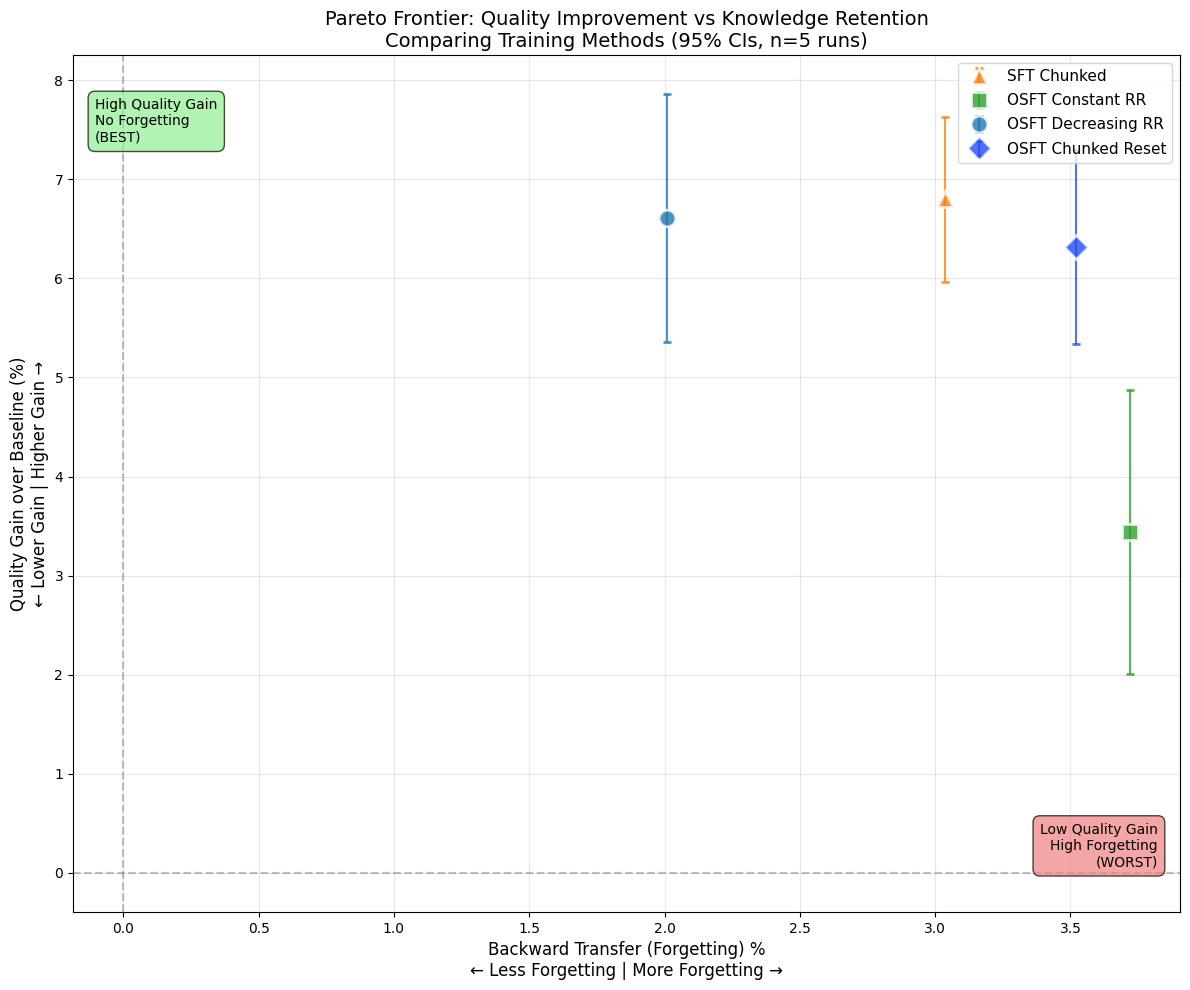

In [24]:
# Plot 7 (FINAL): Pareto Frontier with Percentage-based Backward Transfer
fig, ax = plt.subplots(figsize=(12, 10))


def calculate_quality_gain_with_ci_updated(method_base):
    """
    Calculate % gained on quality compared to baseline with 95% CI
    Returns: (quality_gain, quality_gain_ci)
    """
    # Get baseline performance with CI
    baseline_mean, baseline_ci = get_data_with_ci(df_with_forgetting, {
        'experiment': 'baseline', 'dataset_type': 'default'
    })
    
    # Get method's final performance (chunk 2 for chunked methods)
    if 'full' in method_base:
        exp_name = f'{method_base}'
    else:
        exp_name = f'{method_base}-chunk2'
    
    method_mean, method_ci = get_data_with_ci(df_with_forgetting, {
        'experiment': exp_name, 'dataset_type': 'default'
    })
    
    if baseline_mean > 0 and method_mean > 0:
        # Quality gain = (method - baseline) as percentage points
        quality_gain = method_mean - baseline_mean
        
        # Propagate uncertainty: CI for difference = sqrt(CI1^2 + CI2^2)
        quality_gain_ci = np.sqrt(method_ci**2 + baseline_ci**2)
        
        return quality_gain, quality_gain_ci
    else:
        return 0, 0

def calculate_backward_transfer_percent(method_base, experiment_name):
    """
    Calculate backward transfer metric as percentage:
    For each chunk: (initial - final) / initial * 100
    Then average across chunks
    Range: [0, 100%] where 0% = no forgetting, 100% = complete forgetting
    """
    relative_forgetting_scores = []
    
    for chunk in [0, 1]:  # chunks 1 and 2 (0-indexed)
        # Initial score (single-chunk evaluation) - convert to raw proportion
        initial_exp = f'{method_base}-chunk{chunk}' if method_base != 'sft-chunked' else f'sft-chunked-chunk{chunk}'
        initial_mean, _ = get_data_with_ci(df_with_forgetting, {
            'dataset_type': 'single-chunk', 'experiment': initial_exp
        })
        initial_mean = initial_mean / 100  # Convert back to proportion
        
        # Final score (forgetting evaluation) - convert to raw proportion
        final_exp = f'{experiment_name}-final-on-chunk{chunk}'
        final_mean, _ = get_data_with_ci(df_with_forgetting, {
            'dataset_type': 'forgetting', 'experiment': final_exp
        })
        final_mean = final_mean / 100  # Convert back to proportion
        
        if initial_mean > 0 and final_mean > 0:
            # Relative forgetting = (initial - final) / initial
            # This gives us the fraction of performance lost
            relative_forgetting = (initial_mean - final_mean) / initial_mean
            relative_forgetting_scores.append(relative_forgetting)
    
    # Average relative forgetting across chunks, convert to percentage
    if len(relative_forgetting_scores) > 0:
        return np.mean(relative_forgetting_scores) * 100  # Convert to percentage
    else:
        return 0

# Calculate metrics for each method
methods_for_pareto_final = [
    ('sft-chunked', 'sft-chunked', 'SFT Chunked', '#ff7f0e', '^'),
    ('osft-chunked', 'osft-chunked', 'OSFT Constant RR', '#2ca02c', 's'),
    ('osft-chunked-decreasing', 'osft-chunked-decreasing', 'OSFT Decreasing RR', '#1f77b4', 'o'),
    ('osft-chunked-reset', 'osft-chunked-reset', 'OSFT Chunked Reset', '#234dfe', 'D'),
]

pareto_data_final = []

for method_base, experiment_name, label, color, marker in methods_for_pareto_final:
    backward_transfer_pct = calculate_backward_transfer_percent(method_base, experiment_name)
    quality_gain, quality_gain_ci = calculate_quality_gain_with_ci_updated(method_base)
    
    pareto_data_final.append({
        'label': label,
        'backward_transfer': backward_transfer_pct,
        'quality_gain': quality_gain,
        'quality_gain_ci': quality_gain_ci,
        'color': color,
        'marker': marker
    })
    
    print(f"{label}: Quality Gain = {quality_gain:.2f}% (±{quality_gain_ci:.2f}%), Backward Transfer = {backward_transfer_pct:.2f}%")

# Create the pareto plot with error bars
for data in pareto_data_final:
    ax.errorbar(data['backward_transfer'], data['quality_gain'], 
                yerr=data['quality_gain_ci'],
                marker=data['marker'], markersize=12, 
                color=data['color'], alpha=0.8, 
                markeredgecolor='white', markeredgewidth=2,
                capsize=3, capthick=1.5,
                label=data['label'], linestyle='None')

# Add quadrant lines
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

# Add annotations for quadrants
ax.text(0.02, 0.95, 'High Quality Gain\nNo Forgetting\n(BEST)', 
        transform=ax.transAxes, ha='left', va='top',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.7))

ax.text(0.98, 0.05, 'Low Quality Gain\nHigh Forgetting\n(WORST)', 
        transform=ax.transAxes, ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.7))

# Customize plot
ax.set_xlabel('Backward Transfer (Forgetting) %\n← Less Forgetting | More Forgetting →', fontsize=12)
ax.set_ylabel('Quality Gain over Baseline (%)\n← Lower Gain | Higher Gain →', fontsize=12)
ax.set_title('Pareto Frontier: Quality Improvement vs Knowledge Retention\nComparing Training Methods (95% CIs, n=5 runs)', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right', fontsize=11, labelspacing=0.6)

plt.tight_layout()
plt.show()


## Old plot

![plot](./file.png)

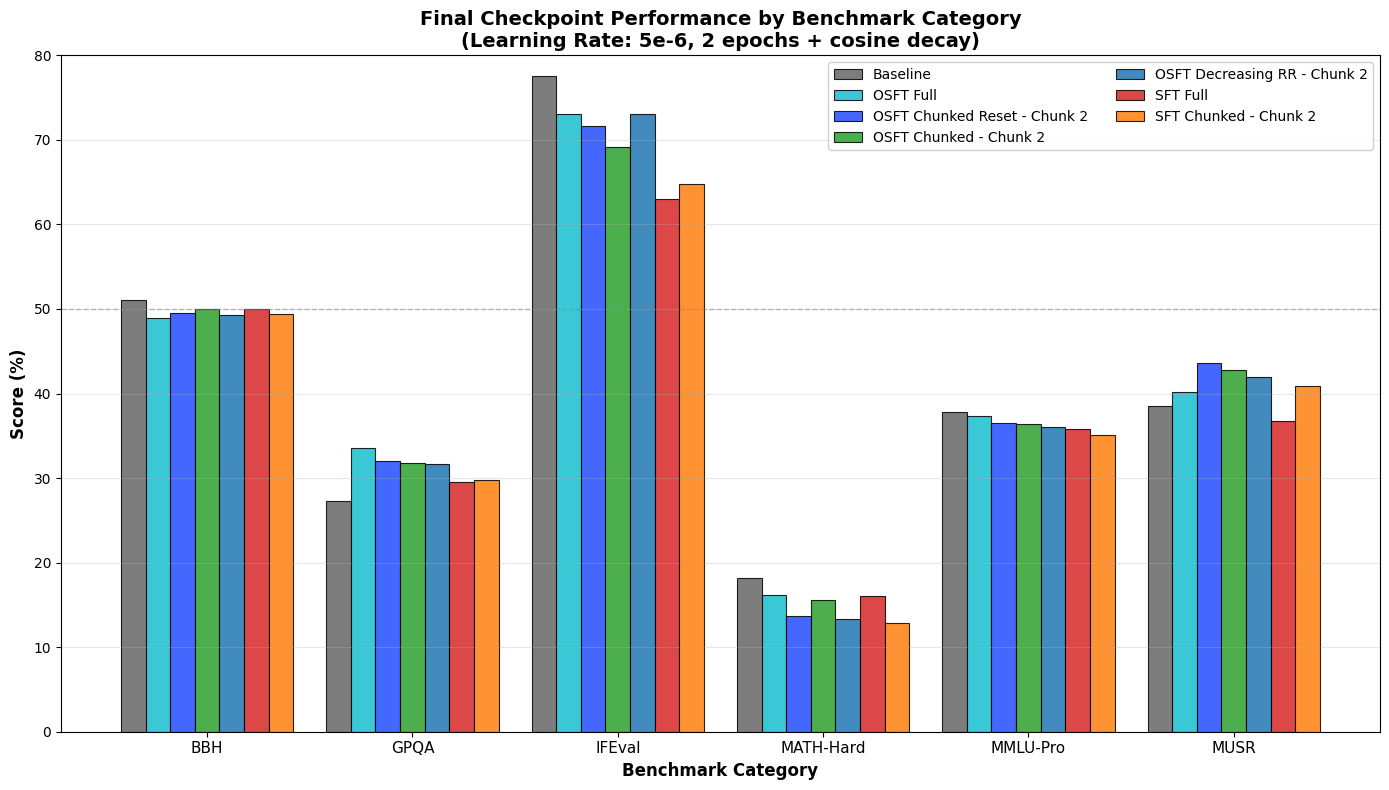

In [30]:
# Plot: Per-Category Leaderboard Scores (Final Checkpoints Only)
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Define categories and their display names
categories = ['bbh', 'gpqa', 'ifeval', 'math_hard', 'mmlu_pro', 'musr']
category_labels = ['BBH', 'GPQA', 'IFEval', 'MATH-Hard', 'MMLU-Pro', 'MUSR']

# Filter to only final checkpoints (Full models and Chunk 2)
final_checkpoints = [
    'Baseline',
    'OSFT Full',
    'OSFT Chunked Reset - Chunk 2',
    'OSFT Chunked - Chunk 2',
    'OSFT Decreasing RR - Chunk 2',
    'SFT Full',
    'SFT Chunked - Chunk 2',
]

# Define colors for each experiment
experiment_colors = {
    'Baseline': '#666666',
    'OSFT Full': '#17becf',
    'OSFT Chunked - Chunk 2': '#2ca02c',
    'OSFT Decreasing RR - Chunk 2': '#1f77b4',
    'SFT Full': '#d62728',
    'SFT Chunked - Chunk 2': '#ff7f0e',
    'OSFT Chunked Reset - Chunk 2': '#234dfe'
}

# Filter the dataframe
final_df = detailed_leaderboard_df[detailed_leaderboard_df['experiment'].isin(final_checkpoints)]

# Get categories on x-axis
x = np.arange(len(categories))

# Calculate bar positioning
n_experiments = len(final_checkpoints)
bar_width = 0.12
total_width = n_experiments * bar_width

# Plot bars for each experiment
for idx, exp in enumerate(final_checkpoints):
    exp_data = final_df[final_df['experiment'] == exp]
    scores = [exp_data[cat].values[0] for cat in categories]
    
    bars = ax.bar(x + idx * bar_width - total_width/2 + bar_width/2, 
                   scores, bar_width,
                   label=exp, color=experiment_colors[exp], 
                   alpha=0.85, edgecolor='black', linewidth=0.8)

ax.set_xlabel('Benchmark Category', fontsize=12, fontweight='bold')
ax.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax.set_title('Final Checkpoint Performance by Benchmark Category\n(Learning Rate: 5e-6, 2 epochs + cosine decay)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(category_labels, fontsize=11)
ax.legend(loc='upper right', ncol=2, fontsize=10, framealpha=0.9)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 80)

# Add horizontal line at 50% for reference
ax.axhline(y=50, color='gray', linestyle='--', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()
